<a href="https://colab.research.google.com/github/ozturkbusrada/AIBOSS-Projects/blob/main/SolarEnergyForecastingwithTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import re
import os

from datetime import datetime
from datetime import timezone
from datetime import date

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# 1. EDA

In [ ]:
opsd_url = 'https://data.open-power-system-data.org/time_series/2020-10-06/time_series_60min_singleindex.csv'

od.download(opsd_url)

Using downloaded and verified file: ./time_series_60min_singleindex.csv


In [ ]:
path_to_csv = 'time_series_60min_singleindex.csv'

df = pd.read_csv(path_to_csv)
df.head()

utc_timestamp        cet_cest_timestamp  \
0  2014-12-31T23:00:00Z  2015-01-01T00:00:00+0100   
1  2015-01-01T00:00:00Z  2015-01-01T01:00:00+0100   
2  2015-01-01T01:00:00Z  2015-01-01T02:00:00+0100   
3  2015-01-01T02:00:00Z  2015-01-01T03:00:00+0100   
4  2015-01-01T03:00:00Z  2015-01-01T04:00:00+0100   

   AT_load_actual_entsoe_transparency  AT_load_forecast_entsoe_transparency  \
0                                 NaN                                   NaN   
1                              5946.0                                6701.0   
2                              5726.0                                6593.0   
3                              5347.0                                6482.0   
4                              5249.0                                6454.0   

   AT_price_day_ahead  AT_solar_generation_actual  \
0                 NaN                         NaN   
1                35.0                         NaN   
2                45.0                         NaN   
3                41.0                         NaN   
4                38.0                         NaN   

   AT_wind_onshore_generation_actual  BE_load_actual_entsoe_transparency  \
0                                NaN                                 NaN   
1                               69.0                              9484.0   
2                               64.0                              9152.0   
3                               65.0                              8799.0   
4                               64.0                              8567.0   

   BE_load_forecast_entsoe_transparency  BE_solar_generation_actual  ...  \
0                                   NaN                         NaN  ...   
1                                9897.0                         NaN  ...   
2                                9521.0                         NaN  ...   
3                                9135.0                         NaN  ...   
4                                8909.0                         NaN  ...   

   SI_load_actual_entsoe_transparency  SI_load_forecast_entsoe_transparency  \
0                                 NaN                                   NaN   
1                                 NaN                                   NaN   
2                             1045.47                                 816.0   
3                             1004.79                                 805.0   
4                              983.79                                 803.0   

   SI_solar_generation_actual  SI_wind_onshore_generation_actual  \
0                         NaN                                NaN   
1                         NaN                                NaN   
2                         NaN                               1.17   
3                         NaN                               1.04   
4                         NaN                               1.61   

   SK_load_actual_entsoe_transparency  SK_load_forecast_entsoe_transparency  \
0                                 NaN                                   NaN   
1                                 NaN                                   NaN   
2                              2728.0                                2860.0   
3                              2626.0                                2810.0   
4                              2618.0                                2780.0   

   SK_solar_generation_actual  SK_wind_onshore_generation_actual  \
0                         NaN                                NaN   
1                         NaN                                NaN   
2                         3.8                                NaN   
3                         3.8                                NaN   
4                         3.8                                NaN   

   UA_load_actual_entsoe_transparency  UA_load_forecast_entsoe_transparency  
0                                 NaN                                   NaN  
1                                 NaN                      

In [ ]:
df.dtypes

utc_timestamp                            object
cet_cest_timestamp                       object
AT_load_actual_entsoe_transparency      float64
AT_load_forecast_entsoe_transparency    float64
AT_price_day_ahead                      float64
                                         ...   
SK_load_forecast_entsoe_transparency    float64
SK_solar_generation_actual              float64
SK_wind_onshore_generation_actual       float64
UA_load_actual_entsoe_transparency      float64
UA_load_forecast_entsoe_transparency    float64
Length: 300, dtype: object

In [ ]:
df.isnull().sum()

utc_timestamp                               0
cet_cest_timestamp                          0
AT_load_actual_entsoe_transparency          1
AT_load_forecast_entsoe_transparency        1
AT_price_day_ahead                         54
                                        ...  
SK_load_forecast_entsoe_transparency        3
SK_solar_generation_actual                269
SK_wind_onshore_generation_actual       16190
UA_load_actual_entsoe_transparency      16190
UA_load_forecast_entsoe_transparency    16190
Length: 300, dtype: int64

In [ ]:
# removing the big dataset

os.remove(path_to_csv)

*1.1* Creating the German dataset

In [ ]:
german_columns = [col for col in list(df)
                  if re.search('DE_', col)
                  and not re.search('DE_LU_', col)
                  and not re.search('_amprion_', col)
                  and not re.search('_tennet_', col)
                  and not re.search('_transnetbw_', col)
                  and not re.search('_50hertz_', col)
                 ]
german_columns

['DE_load_actual_entsoe_transparency',
 'DE_load_forecast_entsoe_transparency',
 'DE_solar_capacity',
 'DE_solar_generation_actual',
 'DE_solar_profile',
 'DE_wind_capacity',
 'DE_wind_generation_actual',
 'DE_wind_profile',
 'DE_wind_offshore_capacity',
 'DE_wind_offshore_generation_actual',
 'DE_wind_offshore_profile',
 'DE_wind_onshore_capacity',
 'DE_wind_onshore_generation_actual',
 'DE_wind_onshore_profile']

In [ ]:
#almayanyaya ait verileri alıyoruz
ger_df = df[['cet_cest_timestamp'] + german_columns]
ger_df.head()

cet_cest_timestamp  DE_load_actual_entsoe_transparency  \
0  2015-01-01T00:00:00+0100                                 NaN   
1  2015-01-01T01:00:00+0100                             41151.0   
2  2015-01-01T02:00:00+0100                             40135.0   
3  2015-01-01T03:00:00+0100                             39106.0   
4  2015-01-01T04:00:00+0100                             38765.0   

   DE_load_forecast_entsoe_transparency  DE_solar_capacity  \
0                                   NaN            37248.0   
1                               39723.0            37248.0   
2                               38813.0            37248.0   
3                               38490.0            37248.0   
4                               38644.0            37248.0   

   DE_solar_generation_actual  DE_solar_profile  DE_wind_capacity  \
0                         NaN               NaN           27913.0   
1                         NaN               NaN           27913.0   
2                         NaN               NaN           27913.0   
3                         NaN               NaN           27913.0   
4                         NaN               NaN           27913.0   

   DE_wind_generation_actual  DE_wind_profile  DE_wind_offshore_capacity  \
0                        NaN              NaN                      667.0   
1                     8852.0           0.3171                      667.0   
2                     9054.0           0.3244                      667.0   
3                     9070.0           0.3249                      667.0   
4                     9163.0           0.3283                      667.0   

   DE_wind_offshore_generation_actual  DE_wind_offshore_profile  \
0                                 NaN                       NaN   
1                               517.0                    0.7744   
2                               514.0                    0.7710   
3                               518.0                    0.7761   
4                               520.0                    0.7793   

   DE_wind_onshore_capacity  DE_wind_onshore_generation_actual  \
0                   27246.0                                NaN   
1                   27246.0                             8336.0   
2                   27246.0                             8540.0   
3                   27246.0                             8552.0   
4                   27246.0                             8643.0   

   DE_wind_onshore_profile  
0                      NaN  
1                   0.3059  
2                   0.3134  
3                   0.3139  
4                   0.3172

In [ ]:
# gereksiz sütunları ve verileri kaldırıyoruz
def fix_col_1(col):
    if re.findall('DE_(.*)', col):
        return re.findall('DE_(.*)', col)[0]
    else:
        return col

def fix_col_2(col):
    if re.findall('(.*)_entsoe_transparency', col):
        return re.findall('(.*)_entsoe_transparency', col)[0]
    else:
        return col


de_columns = list(ger_df)

for col in de_columns:
#     print()
#     print(col)
#     print(de_columns)
    ger_df[fix_col_1(fix_col_2(col))] = ger_df[col]
    if col != fix_col_1(fix_col_2(col)):
#         print('Need to delete: ', col)
        ger_df.drop(col, axis=1, inplace=True)

pct_columns = [col for col in list(ger_df) if re.search('_profile', col)]
ger_df.drop(pct_columns, axis=1, inplace=True)

ger_df.head()

<ipython-input-15-86f198373a9f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ger_df[fix_col_1(fix_col_2(col))] = ger_df[col]
<ipython-input-15-86f198373a9f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ger_df[fix_col_1(fix_col_2(col))] = ger_df[col]
<ipython-input-15-86f198373a9f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

cet_cest_timestamp  load_actual  load_forecast  solar_capacity  \
0  2015-01-01T00:00:00+0100          NaN            NaN         37248.0   
1  2015-01-01T01:00:00+0100      41151.0        39723.0         37248.0   
2  2015-01-01T02:00:00+0100      40135.0        38813.0         37248.0   
3  2015-01-01T03:00:00+0100      39106.0        38490.0         37248.0   
4  2015-01-01T04:00:00+0100      38765.0        38644.0         37248.0   

   solar_generation_actual  wind_capacity  wind_generation_actual  \
0                      NaN        27913.0                     NaN   
1                      NaN        27913.0                  8852.0   
2                      NaN        27913.0                  9054.0   
3                      NaN        27913.0                  9070.0   
4                      NaN        27913.0                  9163.0   

   wind_offshore_capacity  wind_offshore_generation_actual  \
0                   667.0                              NaN   
1                   667.0                            517.0   
2                   667.0                            514.0   
3                   667.0                            518.0   
4                   667.0                            520.0   

   wind_onshore_capacity  wind_onshore_generation_actual  
0                27246.0                             NaN  
1                27246.0                          8336.0  
2                27246.0                          8540.0  
3                27246.0                          8552.0  
4                27246.0                          8643.0

In [ ]:
ger_df.shape

(16190, 11)

In [ ]:
ger_df.isnull().sum()

cet_cest_timestamp                  0
load_actual                         2
load_forecast                       2
solar_capacity                      1
solar_generation_actual            81
wind_capacity                       1
wind_generation_actual             52
wind_offshore_capacity              1
wind_offshore_generation_actual    52
wind_onshore_capacity               1
wind_onshore_generation_actual     50
dtype: int64

In [ ]:
# almanya icin csv dosyası kaydediyoruz bununla ilerleyeceğiz

ger_df.to_csv('germany_wind_and_solar.csv', sep='\t', encoding='utf-8', index=False)

In [ ]:
ger_df.to_csv()

',cet_cest_timestamp,load_actual,load_forecast,solar_capacity,solar_generation_actual,wind_capacity,wind_generation_actual,wind_offshore_capacity,wind_offshore_generation_actual,wind_onshore_capacity,wind_onshore_generation_actual\n0,2015-01-01T00:00:00+0100,,,37248.0,,27913.0,,667.0,,27246.0,\n1,2015-01-01T01:00:00+0100,41151.0,39723.0,37248.0,,27913.0,8852.0,667.0,517.0,27246.0,8336.0\n2,2015-01-01T02:00:00+0100,40135.0,38813.0,37248.0,,27913.0,9054.0,667.0,514.0,27246.0,8540.0\n3,2015-01-01T03:00:00+0100,39106.0,38490.0,37248.0,,27913.0,9070.0,667.0,518.0,27246.0,8552.0\n4,2015-01-01T04:00:00+0100,38765.0,38644.0,37248.0,,27913.0,9163.0,667.0,520.0,27246.0,8643.0\n5,2015-01-01T05:00:00+0100,38941.0,38773.0,37248.0,,27913.0,9231.0,667.0,520.0,27246.0,8712.0\n6,2015-01-01T06:00:00+0100,39045.0,37247.0,37248.0,,27913.0,9689.0,667.0,521.0,27246.0,9167.0\n7,2015-01-01T07:00:00+0100,40206.0,40371.0,37248.0,,27913.0,10331.0,667.0,520.0,27246.0,9811.0\n8,2015-01-01T08:00:00+0100,41133.0,425

In [ ]:
#daha sonra germany_windandsolar.csv dosyasını ilerleyeceğimiz csv dosyasına atıyoruz.
ger_df2 = pd.read_csv('germany_wind_and_solar.csv', sep='\t', encoding='utf-8')
ger_df2.head()

cet_cest_timestamp  load_actual  load_forecast  solar_capacity  \
0  2015-01-01T00:00:00+0100          NaN            NaN         37248.0   
1  2015-01-01T01:00:00+0100      41151.0        39723.0         37248.0   
2  2015-01-01T02:00:00+0100      40135.0        38813.0         37248.0   
3  2015-01-01T03:00:00+0100      39106.0        38490.0         37248.0   
4  2015-01-01T04:00:00+0100      38765.0        38644.0         37248.0   

   solar_generation_actual  wind_capacity  wind_generation_actual  \
0                      NaN        27913.0                     NaN   
1                      NaN        27913.0                  8852.0   
2                      NaN        27913.0                  9054.0   
3                      NaN        27913.0                  9070.0   
4                      NaN        27913.0                  9163.0   

   wind_offshore_capacity  wind_offshore_generation_actual  \
0                   667.0                              NaN   
1                   667.0                            517.0   
2                   667.0                            514.0   
3                   667.0                            518.0   
4                   667.0                            520.0   

   wind_onshore_capacity  wind_onshore_generation_actual  
0                27246.0                             NaN  
1                27246.0                          8336.0  
2                27246.0                          8540.0  
3                27246.0                          8552.0  
4                27246.0                          8643.0

In [ ]:
# günlğk bazda kolonları düzenliyoruz

ger_df2 = ger_df[list(ger_df)]

ger_df2['cet_dttm'] = ger_df2['cet_cest_timestamp'].apply(lambda x: datetime.fromisoformat(x[:-5]))
ger_df2['cet_dt'] = pd.to_datetime(pd.to_datetime(ger_df2['cet_dttm'], utc=True).dt.date)
# monday of this week
ger_df2['cet_week_dt'] = ger_df2['cet_dt'] - pd.to_timedelta(ger_df2['cet_dt'].dt.dayofweek, unit='d')
# first day of this month
ger_df2['cet_month_dt'] = ger_df2['cet_dt'].apply(lambda x: x.replace(day=1))
ger_df2.head()

cet_cest_timestamp  load_actual  load_forecast  solar_capacity  \
0  2015-01-01T00:00:00+0100          NaN            NaN         37248.0   
1  2015-01-01T01:00:00+0100      41151.0        39723.0         37248.0   
2  2015-01-01T02:00:00+0100      40135.0        38813.0         37248.0   
3  2015-01-01T03:00:00+0100      39106.0        38490.0         37248.0   
4  2015-01-01T04:00:00+0100      38765.0        38644.0         37248.0   

   solar_generation_actual  wind_capacity  wind_generation_actual  \
0                      NaN        27913.0                     NaN   
1                      NaN        27913.0                  8852.0   
2                      NaN        27913.0                  9054.0   
3                      NaN        27913.0                  9070.0   
4                      NaN        27913.0                  9163.0   

   wind_offshore_capacity  wind_offshore_generation_actual  \
0                   667.0                              NaN   
1                   667.0                            517.0   
2                   667.0                            514.0   
3                   667.0                            518.0   
4                   667.0                            520.0   

   wind_onshore_capacity  wind_onshore_generation_actual            cet_dttm  \
0                27246.0                             NaN 2015-01-01 00:00:00   
1                27246.0                          8336.0 2015-01-01 01:00:00   
2                27246.0                          8540.0 2015-01-01 02:00:00   
3                27246.0                          8552.0 2015-01-01 03:00:00   
4                27246.0                          8643.0 2015-01-01 04:00:00   

      cet_dt cet_week_dt cet_month_dt  
0 2015-01-01  2014-12-29   2015-01-01  
1 2015-01-01  2014-12-29   2015-01-01  
2 2015-01-01  2014-12-29   2015-01-01  
3 2015-01-01  2014-12-29   2015-01-01  
4 2015-01-01  2014-12-29   2015-01-01

In [ ]:
ger_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16190 entries, 0 to 16189
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   cet_cest_timestamp               16190 non-null  object        
 1   load_actual                      16188 non-null  float64       
 2   load_forecast                    16188 non-null  float64       
 3   solar_capacity                   16189 non-null  float64       
 4   solar_generation_actual          16109 non-null  float64       
 5   wind_capacity                    16189 non-null  float64       
 6   wind_generation_actual           16138 non-null  float64       
 7   wind_offshore_capacity           16189 non-null  float64       
 8   wind_offshore_generation_actual  16138 non-null  float64       
 9   wind_onshore_capacity            16189 non-null  float64       
 10  wind_onshore_generation_actual   16140 non-null  float64  

In [ ]:
ger_df2_h = ger_df2[list(ger_df2)]
ger_df2_h = ger_df2_h.set_index('cet_dttm')
ger_df2_h.head()

cet_cest_timestamp  load_actual  load_forecast  \
cet_dttm                                                                    
2015-01-01 00:00:00  2015-01-01T00:00:00+0100          NaN            NaN   
2015-01-01 01:00:00  2015-01-01T01:00:00+0100      41151.0        39723.0   
2015-01-01 02:00:00  2015-01-01T02:00:00+0100      40135.0        38813.0   
2015-01-01 03:00:00  2015-01-01T03:00:00+0100      39106.0        38490.0   
2015-01-01 04:00:00  2015-01-01T04:00:00+0100      38765.0        38644.0   

                     solar_capacity  solar_generation_actual  wind_capacity  \
cet_dttm                                                                      
2015-01-01 00:00:00         37248.0                      NaN        27913.0   
2015-01-01 01:00:00         37248.0                      NaN        27913.0   
2015-01-01 02:00:00         37248.0                      NaN        27913.0   
2015-01-01 03:00:00         37248.0                      NaN        27913.0   
2015-01-01 04:00:00         37248.0                      NaN        27913.0   

                     wind_generation_actual  wind_offshore_capacity  \
cet_dttm                                                              
2015-01-01 00:00:00                     NaN                   667.0   
2015-01-01 01:00:00                  8852.0                   667.0   
2015-01-01 02:00:00                  9054.0                   667.0   
2015-01-01 03:00:00                  9070.0                   667.0   
2015-01-01 04:00:00                  9163.0                   667.0   

                     wind_offshore_generation_actual  wind_onshore_capacity  \
cet_dttm                                                                      
2015-01-01 00:00:00                              NaN                27246.0   
2015-01-01 01:00:00                            517.0                27246.0   
2015-01-01 02:00:00                            514.0                27246.0   
2015-01-01 03:00:00                            518.0                27246.0   
2015-01-01 04:00:00                            520.0                27246.0   

                     wind_onshore_generation_actual     cet_dt cet_week_dt  \
cet_dttm                                                                     
2015-01-01 00:00:00                             NaN 2015-01-01  2014-12-29   
2015-01-01 01:00:00                          8336.0 2015-01-01  2014-12-29   
2015-01-01 02:00:00                          8540.0 2015-01-01  2014-12-29   
2015-01-01 03:00:00                          8552.0 2015-01-01  2014-12-29   
2015-01-01 04:00:00                          8643.0 2015-01-01  2014-12-29   

                    cet_month_dt  
cet_dttm                          
2015-01-01 00:00:00   2015-01-01  
2015-01-01 01:00:00   2015-01-01  
2015-01-01 02:00:00   2015-01-01  
2015-01-01 03:00:00   2015-01-01  
2015-01-01 04:00:00   2015-01-01

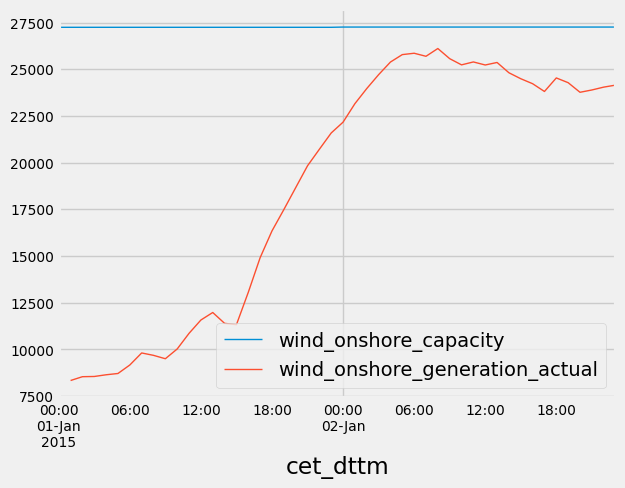

In [ ]:
# dataframede belirli bi zaman aralığındaki seçtiğimiz iki parametre olan
# 'wind_onshore_capacity' ve 'wind_onshore_generation_actual' sütunlarının zaman serilerine bakıyoz.
# RÜZGAR ENERJİ SANTRALİNDEKİ   //// KAPASİTE- GERÇEKLEŞEN ELEKTRİK ÜRETİMİ

# Plot your the discoveries time series
ax = ger_df2_h['2015-01-01':'2015-01-02'][['wind_onshore_capacity', 'wind_onshore_generation_actual']].plot(fontsize=10, linewidth=1)

# Add a red vertical line
# ax.axvline('2020-01-01', color='red', linestyle='--')

# Add a green horizontal line
# ax.axhline(20000, color='green', linestyle='--')

plt.show()

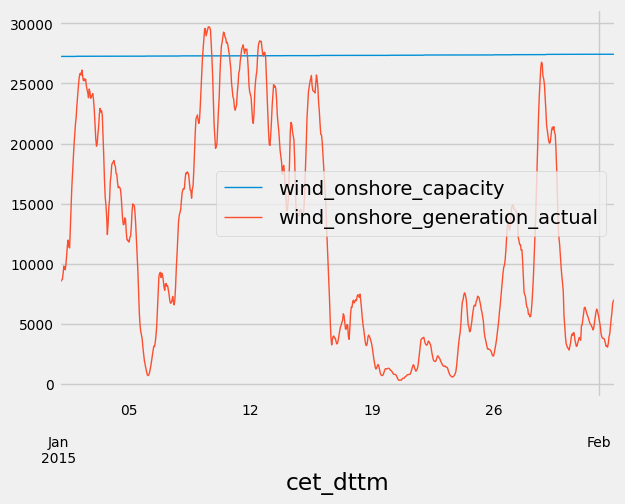

In [ ]:
# aynı santralin ocak ayı kapasite-elektrik üretimine bakıyoruz.

# Plot your the discoveries time series
ax = ger_df2_h['2015-01-01':'2015-02-01'][['wind_onshore_capacity', 'wind_onshore_generation_actual']].plot(fontsize=10, linewidth=1)

# Add a red vertical line
# ax.axvline('2020-01-01', color='red', linestyle='--')

# Add a green horizontal line
# ax.axhline(20000, color='green', linestyle='--')

plt.show()

1.2. Daily dataset

In [ ]:
# günlük bazda güneş enerjı santralindeki elektrik üretimi
# rüzgar enerji santralindeki elektrik üretimi
# deniz bazlı rüzgar santralindeki elektirk üretimi
# kara bazlı rüzgar santralindeki elektirk üretimine bakıyoruz

ger_daily_generation_df = ger_df2[['cet_dt',
    'solar_generation_actual',
    'wind_generation_actual',
    'wind_offshore_generation_actual','wind_onshore_generation_actual'
]].groupby(['cet_dt']).sum()

ger_daily_generation_df.head(20)

solar_generation_actual  wind_generation_actual  \
cet_dt                                                        
2015-01-01                  17098.0                302693.0   
2015-01-02                   7757.0                601950.0   
2015-01-03                   7237.0                469167.0   
2015-01-04                  19982.0                390566.0   
2015-01-05                  26522.0                227370.0   
2015-01-06                  32888.0                109591.0   
2015-01-07                  17114.0                221294.0   
2015-01-08                   8599.0                432866.0   
2015-01-09                   6822.0                644152.0   
2015-01-10                  20473.0                630566.0   
2015-01-11                  19811.0                629974.0   
2015-01-12                  11025.0                633641.0   
2015-01-13                  50283.0                517942.0   
2015-01-14                  18106.0                409018.0   
2015-01-15                  17155.0                549017.0   
2015-01-16                  22818.0                267454.0   
2015-01-17                  21405.0                134251.0   
2015-01-18                  31259.0                131503.0   
2015-01-19                  23681.0                 33361.0   
2015-01-20                  10791.0                 17173.0   

            wind_offshore_generation_actual  wind_onshore_generation_actual  
cet_dt                                                                       
2015-01-01                          11992.0                        290701.0  
2015-01-02                          10329.0                        591622.0  
2015-01-03                          12120.0                        457046.0  
2015-01-04                          11540.0                        379028.0  
2015-01-05                           7748.0                        219622.0  
2015-01-06                           6887.0                        102704.0  
2015-01-07                          10694.0                        210599.0  
2015-01-08                          12334.0                        420529.0  
2015-01-09                           8803.0                        635350.0  
2015-01-10                           6504.0                        624058.0  
2015-01-11                           9550.0                        620424.0  
2015-01-12                          11670.0                        621971.0  
2015-01-13                           8941.0                        508997.0  
2015-01-14                           8972.0                        400045.0  
2015-01-15                          12271.0                        536749.0  
2015-01-16                          10404.0                        257052.0  
2015-01-17                          11517.0                        122733.0  
2015-01-18                           5239.0                        126263.0  
2015-01-19                            483.0                         32880.0  
2015-01-20                           1281.0                         15893.0

In [ ]:
ger_daily_generation_df_slice = ger_daily_generation_df['2015':'2020']
ger_daily_generation_df_slice

solar_generation_actual  wind_generation_actual  \
cet_dt                                                        
2015-01-01                  17098.0                302693.0   
2015-01-02                   7757.0                601950.0   
2015-01-03                   7237.0                469167.0   
2015-01-04                  19982.0                390566.0   
2015-01-05                  26522.0                227370.0   
...                             ...                     ...   
2016-11-01                  53600.0                235376.0   
2016-11-02                  39838.0                433445.0   
2016-11-03                  53305.0                116722.0   
2016-11-04                  46151.0                258295.0   
2016-11-05                  12496.0                100476.0   

            wind_offshore_generation_actual  wind_onshore_generation_actual  
cet_dt                                                                       
2015-01-01                          11992.0                        290701.0  
2015-01-02                          10329.0                        591622.0  
2015-01-03                          12120.0                        457046.0  
2015-01-04                          11540.0                        379028.0  
2015-01-05                           7748.0                        219622.0  
...                                     ...                             ...  
2016-11-01                          65947.0                        169427.0  
2016-11-02                          59020.0                        374423.0  
2016-11-03                          19515.0                        102129.0  
2016-11-04                          56054.0                        202239.0  
2016-11-05                           9672.0                         90803.0  

[675 rows x 4 columns]

In [ ]:
ger_wind_df_slice = ger_daily_generation_df_slice[['wind_generation_actual']]


print(ger_wind_df_slice.describe())
print()

print(ger_wind_df_slice.describe().loc['max'])
print(ger_wind_df_slice.describe().loc['min'])

       wind_generation_actual
count              675.000000
mean            203488.431111
std             150298.192437
min                  0.000000
25%              90464.500000
50%             157707.000000
75%             273623.500000
max             743789.000000

wind_generation_actual    743789.0
Name: max, dtype: float64
wind_generation_actual    0.0
Name: min, dtype: float64


In [ ]:
ger_solar_df_slice = ger_daily_generation_df_slice[['solar_generation_actual']]


print(ger_solar_df_slice.describe())
print()

print(ger_solar_df_slice.describe().loc['max'])
print(ger_solar_df_slice.describe().loc['min'])

       solar_generation_actual
count               675.000000
mean             100125.958519
std               59929.149351
min                   0.000000
25%               42375.500000
50%              104664.000000
75%              148264.000000
max              229710.000000

solar_generation_actual    229710.0
Name: max, dtype: float64
solar_generation_actual    0.0
Name: min, dtype: float64


# 1.3. Weekly dataset

In [ ]:
ger_weekly_generation_df = ger_df2[['cet_week_dt',
    'solar_generation_actual',
    'wind_generation_actual',
    'wind_offshore_generation_actual','wind_onshore_generation_actual'
]].groupby(['cet_week_dt']).sum()

ger_weekly_generation_df.head(20)

solar_generation_actual  wind_generation_actual  \
cet_week_dt                                                    
2014-12-29                   52074.0               1764376.0   
2015-01-05                  132229.0               2895813.0   
2015-01-12                  172051.0               2642826.0   
2015-01-19                   97130.0                468323.0   
2015-01-26                  130888.0               1683353.0   
2015-02-02                  254387.0               1311524.0   
2015-02-09                  300430.0               1001276.0   
2015-02-16                  385706.0               1404748.0   
2015-02-23                  359899.0               1765579.0   
2015-03-02                  620977.0               2103152.0   
2015-03-09                  625071.0                954381.0   
2015-03-16                  820168.0               1022882.0   
2015-03-23                  595854.0               1256071.0   
2015-03-30                  728689.0               2489932.0   
2015-04-06                 1025347.0                989668.0   
2015-04-13                 1127334.0               1307848.0   
2015-04-20                 1171339.0                781147.0   
2015-04-27                  877964.0                883793.0   
2015-05-04                 1025085.0               1740643.0   
2015-05-11                 1106713.0               1226607.0   

             wind_offshore_generation_actual  wind_onshore_generation_actual  
cet_week_dt                                                                   
2014-12-29                           45981.0                       1718397.0  
2015-01-05                           62520.0                       2833286.0  
2015-01-12                           69014.0                       2573810.0  
2015-01-19                           30111.0                        438209.0  
2015-01-26                           59824.0                       1623530.0  
2015-02-02                           55712.0                       1255809.0  
2015-02-09                           65459.0                        935818.0  
2015-02-16                           81511.0                       1323237.0  
2015-02-23                           93694.0                       1671877.0  
2015-03-02                          119154.0                       1983999.0  
2015-03-09                           88560.0                        865826.0  
2015-03-16                           71061.0                        951817.0  
2015-03-23                           84130.0                       1171939.0  
2015-03-30                          113825.0                       2376105.0  
2015-04-06                           65138.0                        924535.0  
2015-04-13                          111864.0                       1195976.0  
2015-04-20                           80328.0                        700814.0  
2015-04-27                           90051.0                        793740.0  
2015-05-04                          174288.0                       1566357.0  
2015-05-11                          132685.0                       1093915.0

In [ ]:
ger_weekly_generation_df.shape

(97, 4)

# 1.4. Monthly dataset

In [ ]:
ger_monthly_generation_df = ger_df2[['cet_month_dt',
    'solar_generation_actual',
    'wind_generation_actual',
    'wind_offshore_generation_actual','wind_onshore_generation_actual'
]].groupby(['cet_month_dt']).sum()

ger_monthly_generation_df.head(20)

solar_generation_actual  wind_generation_actual  \
cet_month_dt                                                    
2015-01-01                   559692.0               9334624.0   
2015-02-01                  1288413.0               5148466.0   
2015-03-01                  2858576.0               6923411.0   
2015-04-01                  4435384.0               5002872.0   
2015-05-01                  4411604.0               5262785.0   
2015-06-01                  4552821.0               4095101.0   
2015-07-01                  4917511.0               5863167.0   
2015-08-01                  4612575.0               3858013.0   
2015-09-01                  3226533.0               5547629.0   
2015-10-01                  1946347.0               3983075.0   
2015-11-01                  1136483.0              10554409.0   
2015-12-01                   850930.0              11590087.0   
2016-01-01                   654311.0               9259135.0   
2016-02-01                  1255926.0               9824520.0   
2016-03-01                  2414519.0               5997268.0   
2016-04-01                  3749052.0               5908710.0   
2016-05-01                  4716769.0               6102541.0   
2016-06-01                  4644751.0               3180248.0   
2016-07-01                  4943602.0               4651518.0   
2016-08-01                  4717276.0               4750557.0   

              wind_offshore_generation_actual  wind_onshore_generation_actual  
cet_month_dt                                                                   
2015-01-01                           261446.0                       9073168.0  
2015-02-01                           282754.0                       4865705.0  
2015-03-01                           431976.0                       6491432.0  
2015-04-01                           378485.0                       4624380.0  
2015-05-01                           565139.0                       4697640.0  
2015-06-01                           481563.0                       3613528.0  
2015-07-01                           707917.0                       5155259.0  
2015-08-01                           570967.0                       3287053.0  
2015-09-01                           768406.0                       4779224.0  
2015-10-01                           888197.0                       3094875.0  
2015-11-01                          1293590.0                       9260812.0  
2015-12-01                          1503090.0                      10086995.0  
2016-01-01                          1382625.0                       7876506.0  
2016-02-01                          1152100.0                       8672423.0  
2016-03-01                           843767.0                       5153524.0  
2016-04-01                           884811.0                       5023872.0  
2016-05-01                           916711.0                       5185815.0  
2016-06-01                           516138.0                       2664109.0  
2016-07-01                           766119.0                       3885392.0  
2016-08-01                           876935.0                       3873639.0

In [ ]:
ger_monthly_generation_df.shape

(23, 4)

# 1.4 Missingness in the daily df

In [ ]:
import missingno as msno

'/usr/local/share/datasets/matrix_frequency.png'

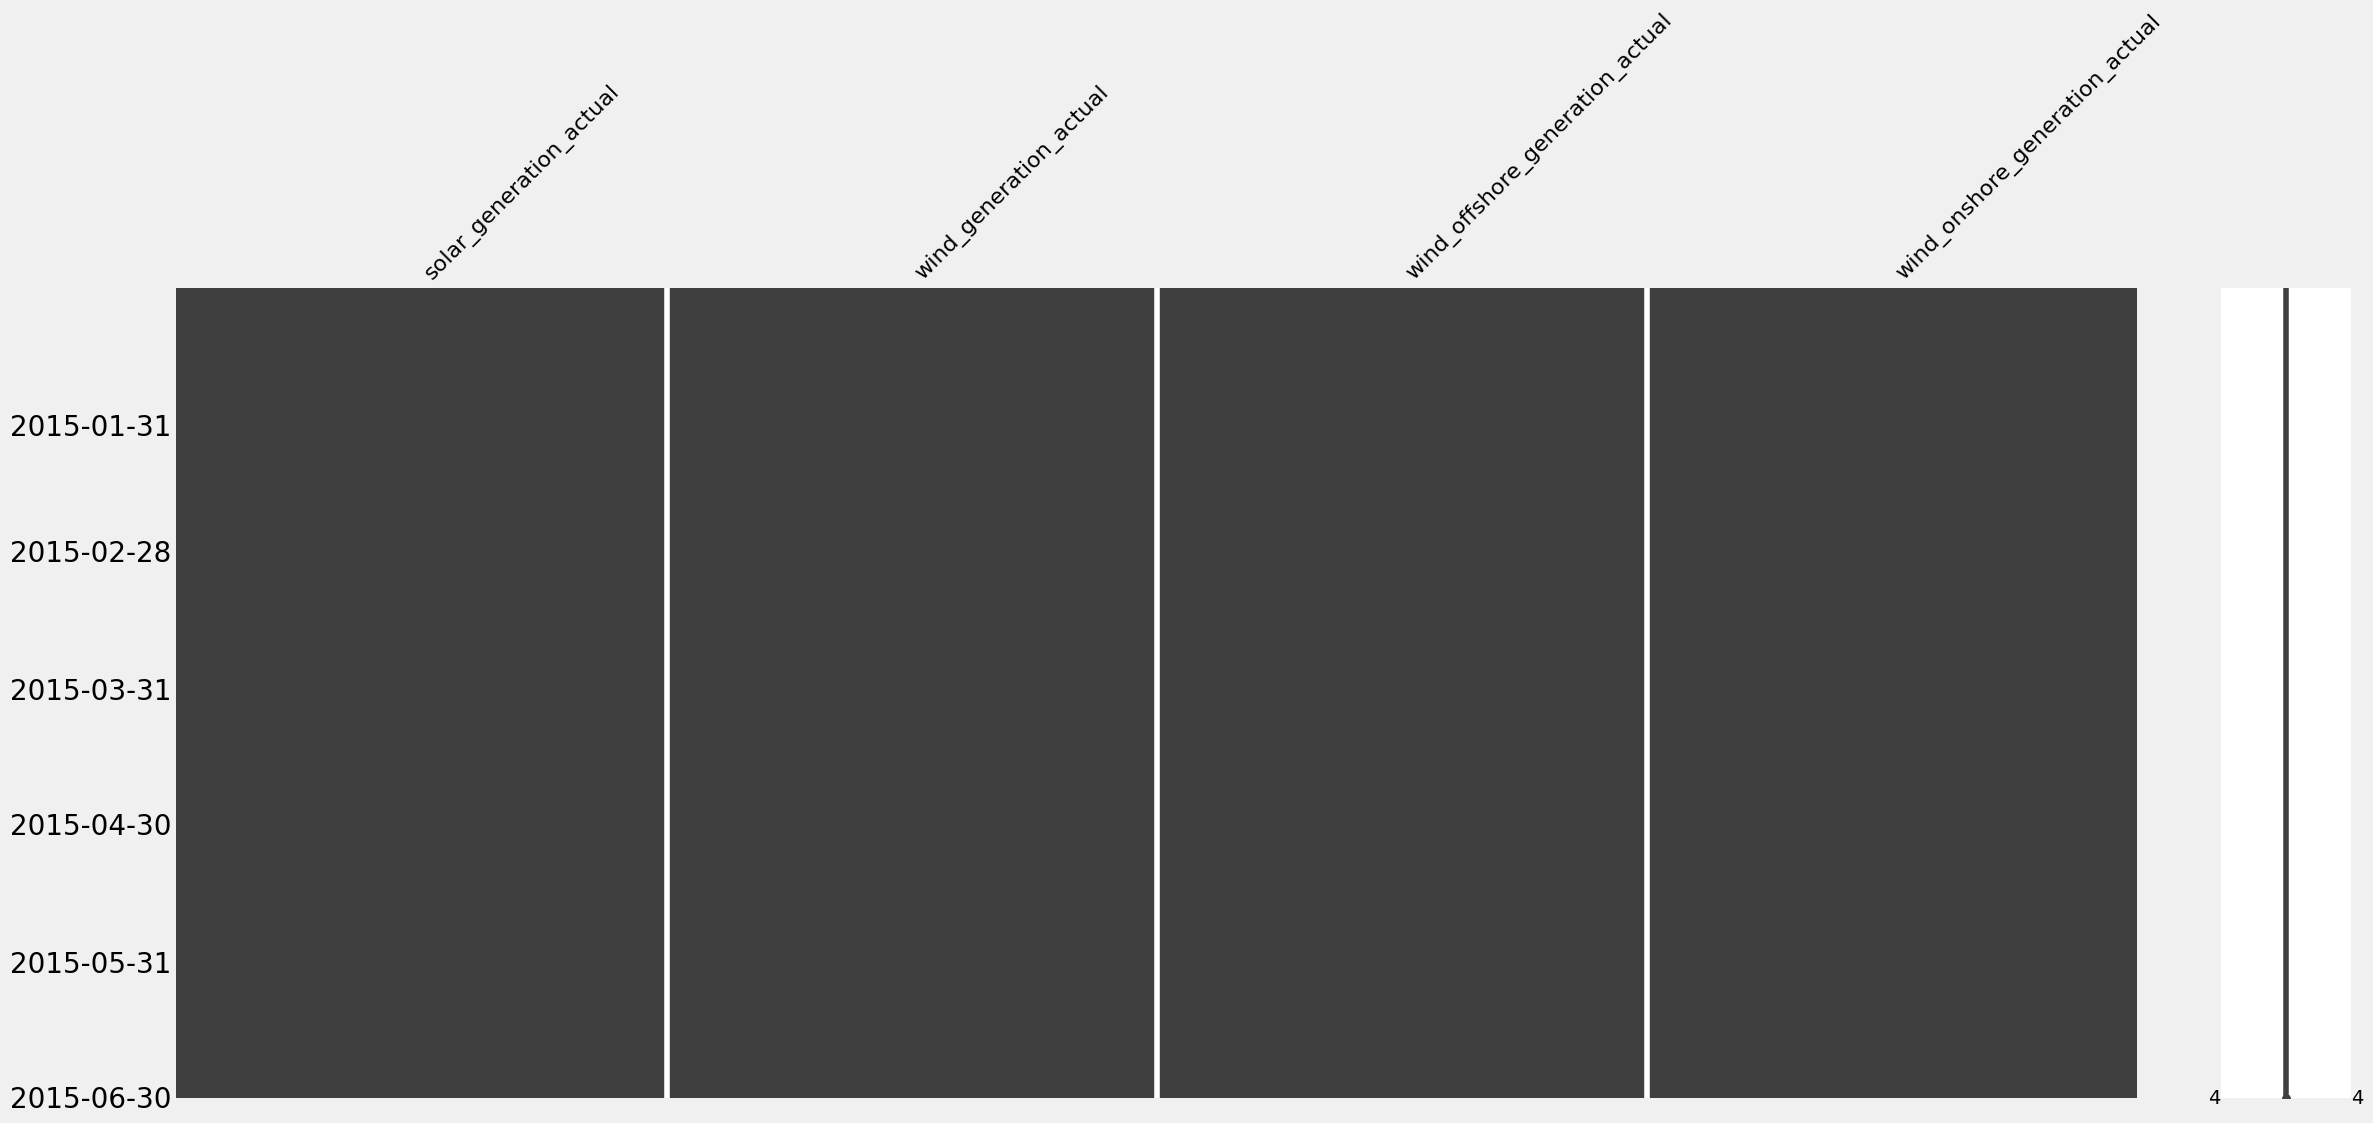

In [ ]:
# eksik veriler iaynı frekansta görselleştiriyoruz
msno.matrix(ger_daily_generation_df.loc['Jan-2015':'Jun-2015'], freq='M')
display("/usr/local/share/datasets/matrix_frequency.png")

# 1.5. Plots for the daily German dataset

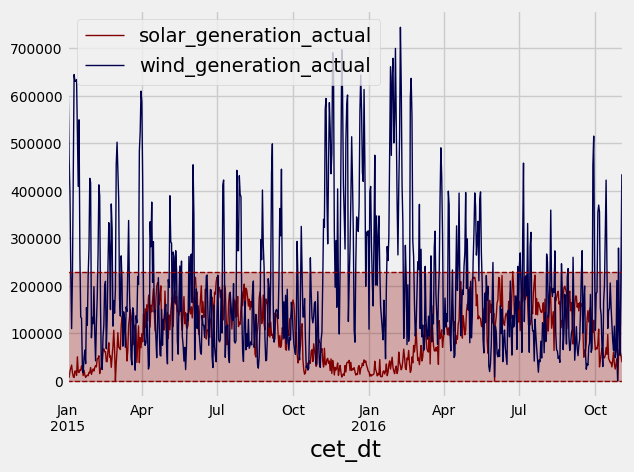

In [ ]:
# oluşturulan daily_generation sütununda rüzgar ve güneş enerjisi üretimlerini karşılaştırıyoruz.


ax = ger_daily_generation_df_slice[[
    'solar_generation_actual','wind_generation_actual'
]].plot(fontsize=10, linewidth=1, colormap='seismic_r') # color='blue'


# Add vertical lines
ax.axvline('2019-01-01', color='green', linestyle='--', linewidth=1)
ax.axvline('2020-01-01', color='green', linestyle='--', linewidth=1)

# Add a vertical red shaded region
ax.axvspan('2019-01-01', '2020-01-01', color='green', alpha=0.3)


solar_max = ger_daily_generation_df_slice['solar_generation_actual'].max()
solar_min = ger_daily_generation_df_slice['solar_generation_actual'].min()

# Add a green horizontal line
ax.axhline(solar_max, color='darkred', linestyle='--', linewidth=1)
ax.axhline(solar_min, color='darkred', linestyle='--', linewidth=1)

# Add a horizontal green shaded region
ax.axhspan(solar_min, solar_max, color='darkred', alpha=0.3)

plt.show()

In [ ]:
def plot_rolling_mean_std(df, column, window_size):

    # Compute the 52 weeks rolling mean and rolling standard deviation of the wind_generation_actual
    ma = df[[column]].rolling(window=window_size).mean()
    mstd = df[[column]].rolling(window=window_size).std()

    # Add the upper and lower bound columns to the ma DataFrame
    ma['upper'] = ma[column] + (2 * mstd[column])
    ma['lower'] = ma[column] - (2 * mstd[column])

    fig, ax = plt.subplots(figsize = (8,6))

    c = sns.lineplot(data = ma, ax=ax, linewidth=1)
    line = c.get_lines()
    plt.fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color='darkblue', alpha=.2)

    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel(column, fontsize=10)
    ax.set_title(f'Rolling mean and variance of {column}\nin Germany from 2018 to 2020'.format(column=column), fontsize=10)
    plt.xticks(rotation = 45, size=10)
    plt.yticks(size=10)
    plt.legend(fontsize="10")

    plt.show()

    return 1

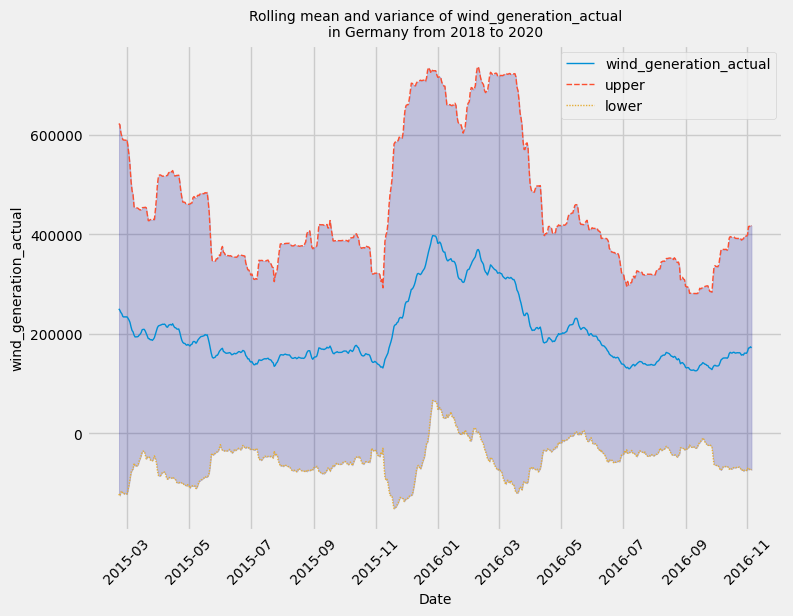

1

In [ ]:
plot_rolling_mean_std(ger_daily_generation_df_slice, 'wind_generation_actual', window_size=52)

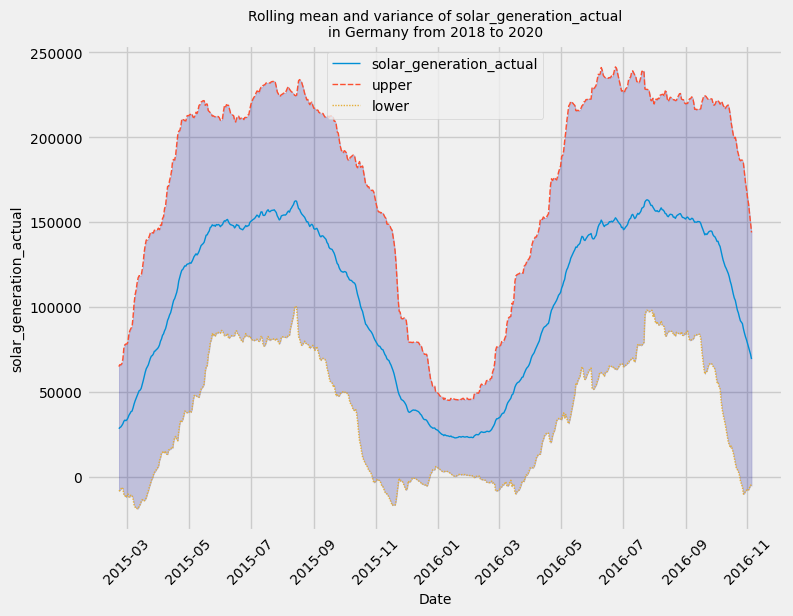

1

In [ ]:
plot_rolling_mean_std(ger_daily_generation_df_slice, 'solar_generation_actual', window_size=52)

In [ ]:
def plot_by_month(df):

    index_month = df.index.month
    mean_df_by_month = df.groupby(index_month).mean()

    ax = mean_df_by_month.plot(fontsize=6, linewidth=1)

    plt.legend(fontsize=10)
    plt.show()

    return 1

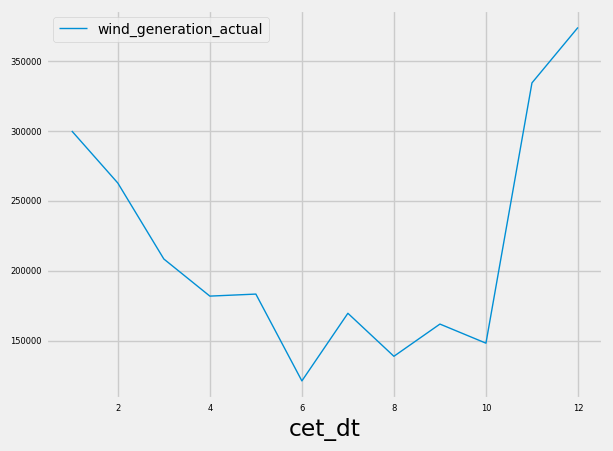

1

In [ ]:
# dataframe deki verilerin aylara göre ortalamasını alma + görselleştirme
plot_by_month(ger_daily_generation_df_slice[['wind_generation_actual']])

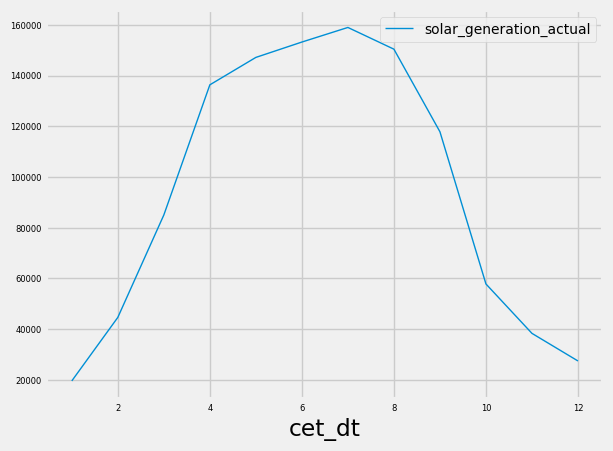

1

In [ ]:
plot_by_month(ger_daily_generation_df_slice[['solar_generation_actual']])

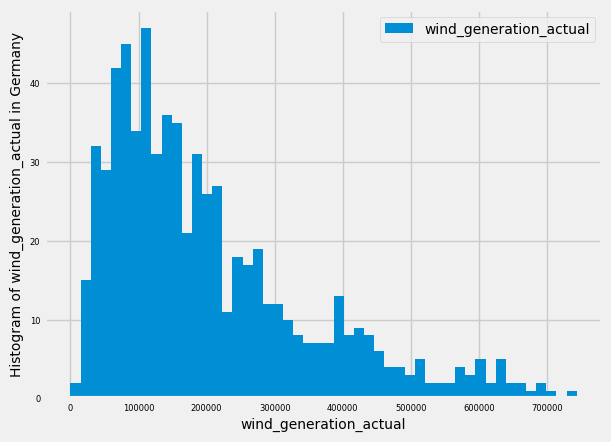

In [ ]:
# Generate a histogram
ax = ger_daily_generation_df_slice[['wind_generation_actual']].plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('wind_generation_actual', fontsize=10)
ax.set_ylabel('Histogram of wind_generation_actual in Germany', fontsize=10)
plt.legend(fontsize=10)
plt.show()

#değerlerin çarpık oldugunu görebiliyoruz.

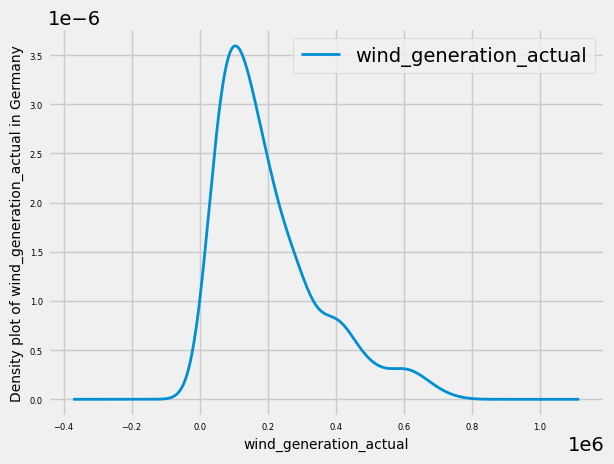

In [ ]:
# yoğunluk grafiği
# Display density plot
ax = ger_daily_generation_df_slice[['wind_generation_actual']].plot(kind='density', linewidth=2, fontsize=6)

# Annotate labels
ax.set_xlabel('wind_generation_actual', fontsize=10)
ax.set_ylabel('Density plot of wind_generation_actual in Germany', fontsize=10)
plt.show()

# MULTIPLE ts

In [ ]:
ger_wind_solar_df = ger_daily_generation_df[list(ger_daily_generation_df)][['wind_generation_actual', 'solar_generation_actual']]
ger_wind_solar_df_slice = ger_wind_solar_df['2015':'2020']

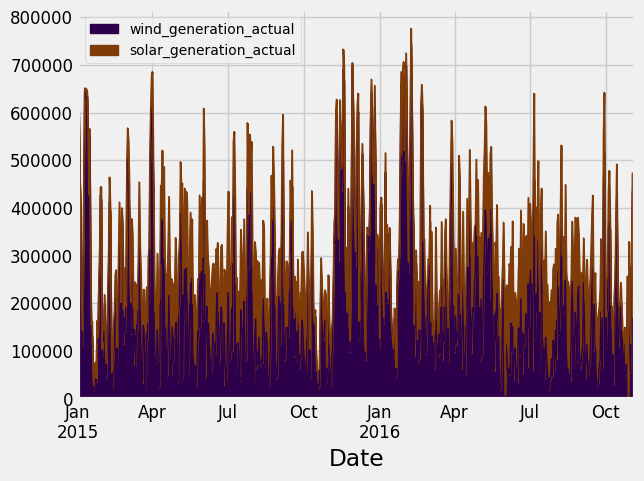

In [ ]:
# Plot a STACKED area chart
ax = ger_daily_generation_df_slice[['wind_generation_actual', 'solar_generation_actual']].plot.area(colormap='PuOr_r', fontsize=12, linewidth=1, stacked=True) # , stacked=False

ax.set_xlabel('Date')
ax.legend(fontsize=10)
plt.show()

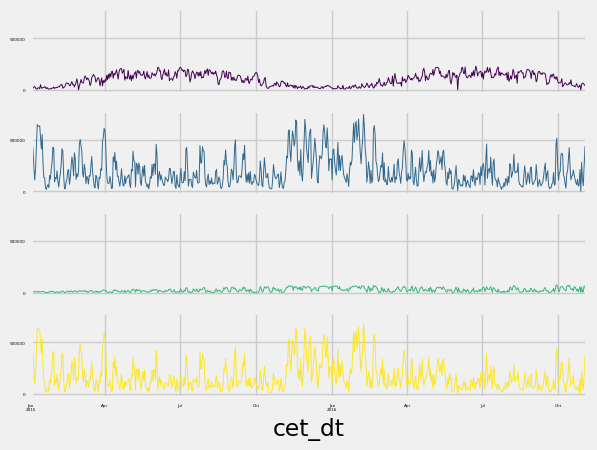

In [ ]:
#farklı enerji üretim türlerinin günlük değişimlerini karşılaştırıyoruz
# Create a facetted graph with 4 rows and 1 columns
ax = ger_daily_generation_df_slice.plot(subplots=True,
                      layout=(4,1),
                      sharex=True,
                      sharey=True,
                      colormap='viridis',
                      linewidth=0.7,
                      fontsize=3,
                      legend=False)

plt.show()

# KORELASYON

In [ ]:
print(ger_daily_generation_df_slice[['wind_generation_actual', 'solar_generation_actual']].corr(method='pearson'))

                         wind_generation_actual  solar_generation_actual
wind_generation_actual                 1.000000                -0.373933
solar_generation_actual               -0.373933                 1.000000


wind generation actual ın kendisiyle olan korelasyonu 1 ( güzel)
solar genaration actual ın kendisiyle olab korelasyonu 1 ( güzel )
solar - wind korelasyonu , Yani, rüzgar enerjisi üretimi artarken, güneş enerjisi üretimi biraz azalma eğilimi göstermektedir.( hafif negatif )



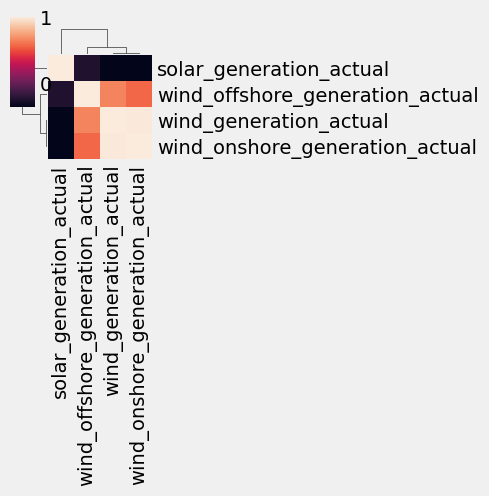

In [ ]:
# Get correlation matrix
corr_wind_solar = ger_daily_generation_df_slice.corr(method='pearson')

fig = sns.clustermap(corr_wind_solar,
                     row_cluster=True,
                     col_cluster=True,
                     figsize=(5, 5))
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=90)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

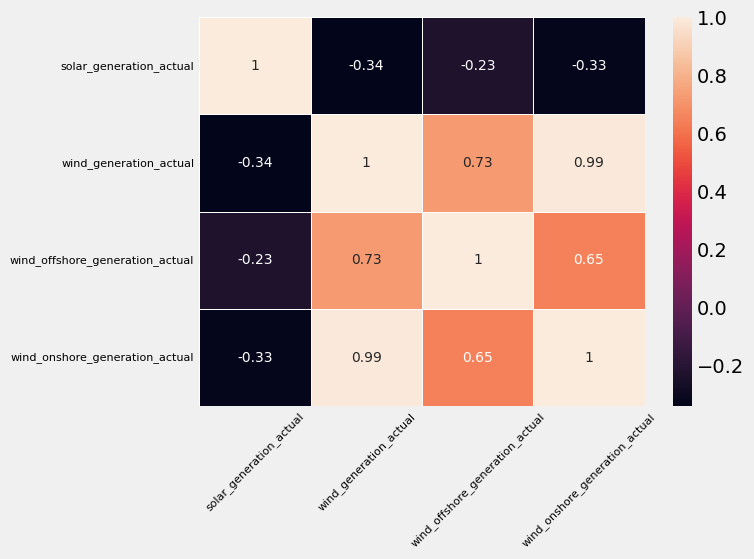

In [ ]:
# korelasyon matrisi
corr_wind_solar = ger_daily_generation_df_slice.corr(method='spearman')

sns.heatmap(corr_wind_solar,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10})
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.show()

# 2.  ARIMA models

**BBox-Jenkins yöntemi
ARIMA modeli:

AR = otoregresif (AR: Auto-Regressive)

I = entegre (I: Integrated)

MA = hareketli ortalama (MA: Moving Average)

order=(p,d,q):

p - otoregresif gecikmelerin sayısı
d - diferansiyel düzeyi
q - hareketli ortalama gecikmelerin sayısı
Otoregresif (AR) model, mevcut değerin (y_t) önceki değerlere (y_(t-1), y_(t-2), …) bağlı olduğunu varsayar. Bu varsayıma dayanarak, lineer regresyon modeli oluşturabiliriz. Bir AR modelinin düzenini belirlemek için, Kısmi Otokorelasyon Fonksiyonuna (PACF) bakmanız gerekir.

Hareketli Ortalama (MA) modeli, mevcut değerin (y_t) mevcut hata terimleriyle (𝜖_t, 𝜖_(t-1),…) ilişkili olduğunu varsayar. Hata terimleri rastgele olduğu için, mevcut değerle hata terimleri arasında lineer bir ilişki yoktur. Bir MA modelinin düzenini belirlemek için, Otokorelasyon Fonksiyonuna (ACF) bakmanız gerekir.**

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_absolute_percentage_error
import itertools

Box-Jenkins yönteminin adımları :

1. Tanımlama (Zaman serisi durağan mı? Hangi farklılaştırma/dönüşüm onu durağan hale getirecek?)

Dicky-Fuller testini çalıştırın.
ADF istatistiğini ve p değerini inceleyin.
ACF (Otomatik Korelasyon Fonksiyonu) ve PACF (Kısmi Otomatik Korelasyon Fonksiyonu) grafiklerini çizin.
2. Tahmin (Hangi p ve q değerleri en umut vericidir?)

ARIMA(p,d,q) modeli için p ve q değerlerini seçmek için p ve q üzerinde döngü yapın.
3. Tanı (Model uygun mu?)

dört tanı grafikleri çizin.
Özet istatistikleri inceleyin.
4. Karar

Model uygun değilse, 1-3 adımlarını tekrarlayın (örneğin, mevsimsel ARIMA için).
Model uygun ise, 5. adıma geçin.
5. Üretim

results.get_forecast() ile tahmin sonuçlarını elde edin.

In [ ]:
def plot_seasonal_components(ts, period):

    decomp_weekly = seasonal_decompose(ts, period=period)

    fig, axes = plt.subplots(4, 1, sharex=True)

    decomp_weekly.observed.plot(ax=axes[0], legend=False, color='r', linewidth=1)
    axes[0].set_ylabel('Observed', fontsize=12)

    decomp_weekly.trend.plot(ax=axes[1], legend=False, color='g', linewidth=1)
    axes[1].set_ylabel('Trend', fontsize=12)

    decomp_weekly.seasonal.plot(ax=axes[2], legend=False, linewidth=1)
    axes[2].set_ylabel('Seasonal', fontsize=12)

    decomp_weekly.resid.plot(ax=axes[3], legend=False, color='k', linewidth=1)
    axes[3].set_ylabel('Residual', fontsize=12)

    return 1

! Eğer bir yukarı doğru eğilim varsa, zaman serisi durağan değildir.

Verilerimiz durağan değil olduğu için, zaman serisini durağan hale getirmek için hangi farklılaştırmanın yapılması gerektiğini belirlememiz gerekiyor. Bunun için obtain_adf_kpss_results fonksiyonumuzu kullanarak kaç kez farklılaştırma uygulamamız gerektiğini bulacağız. Bu, ARIMA modeli için parametre d olacak.

Mevsimsel bileşenden, modelin toplamsal olduğunu gözlemleyebiliriz, çünkü mevsimsel bileşen zaman içinde benzerdir (çarpan olarak alınmaz).

Ayrıca, mevsimsel bileşende bazı noktalarda genel minimum ve maksimumlarla mevsimsellik gözlemleyebiliriz.



In [ ]:
def obtain_adf_kpss_results(ts, max_d):
    """ Build dataframe with ADF statistics and p-value for time series after applying difference on time series

    Args:
        ts (df): Dataframe of univariate time series
        max_d (int): Max value of how many times apply difference

    Returns:
        Dataframe showing values of ADF statistics and p when applying ADF test after applying d times
        differencing on a time-series.

    """

    results = []

    for idx in range(max_d):
        adf_result = adfuller(ts, autolag='AIC')
        kpss_result = kpss(ts, regression='c', nlags="auto")

        if adf_result[1] <= 0.05:
            adf_stationary = True
        else:
            adf_stationary = False

        if kpss_result[1] <= 0.05:
            kpss_stationary = False
        else:
            kpss_stationary = True

        stationary = adf_stationary & kpss_stationary
        results.append((idx, adf_result[1], kpss_result[1], adf_stationary, kpss_stationary, stationary))
        ts = ts.diff().dropna() # counter of differencing

    # Construct DataFrame
    results_df = pd.DataFrame(results, columns=['d', 'adf_stats', 'p-value', 'is_adf_stationary', 'is_kpss_stationary', 'is_stationary' ])

    return results_df

# 2.1. Identification

# 2.1.1 ADF TESTİ

**ADF testi (Artırılmış Dicky-Fuller testi)

Bu, durağanlık için bir testtir
Eğer zaman serisi durağansa, ARMA modelini uygulamayı deneyin.
Eğer zaman serisi durağan değilse, d değerini bulmaya çalışın

zaman serisi durağan değilse, yani durağanlık özelliği göstermiyorsa, d değerini bulmak için farklılaştırma yapılması gerekebilir

ADF test istatistiği daha negatif ise, durağan olma olasılığı daha yüksektir.
P değeri küçükse, boş hipotezi reddediyoruz - durağanlık hipotezini reddediyoruz.**

In [ ]:
def run_adf_test(ts, diff_order):
    '''
    diff_order = 0, 1, 2
    '''

    if diff_order == 0:
        ts0 = ts.dropna()
    elif diff_order == 1:
        ts0 = ts.dropna().diff().dropna()
    elif diff_order == 2:
        ts0 = ts.dropna().diff().dropna().diff().dropna()
    else:
        ts0 = ts.dropna()

    result = adfuller(ts0)

    fig, ax = plt.subplots()
    ts0.plot(ax=ax, linewidth=1)
    plt.show()

    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical values:', result[4])

    return 1

# 2.1.2
# ACF(otokorelasyon fonksiyonu) testi
# PACF(kısmi otokorelasyon fonksiyonu) testi

In [ ]:
def plot_acf_pacf(ts, lags):

    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

#     for q
    plot_acf(ts.dropna(), lags=lags, zero=False, ax=ax1) # .diff().dropna()
#     for p
    plot_pacf(ts.dropna(), lags=lags, zero=False, ax=ax2) # .diff().dropna()

    plt.show()

    return 1

def plot_acf_functions(ts, lags):

     fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
     plot_acf(ts.dropna(), lags=lags, ax=ax1)
     plot_acf(ts.dropna().diff().dropna(), lags=lags, ax=ax2)
     plot_acf(ts.dropna().diff().dropna().diff().dropna(), lags=lags, ax=ax3)
     plt.show()

     return(1)

# 2.2. Estimation

Optimal p ve q değerlerini seçmek için 2 yöntem var

Biri PACF / ACF grafikleri

Öteki de AIC (Akaike Bilgi Kriteri) ve BIC (Bayes Bilgi Kriteri)
                  Daha düşük AIC veya BIC değerleri, daha iyi bir model uyumu ve daha az aşırı uydurma (overfitting) eğilimi

In [ ]:
def sort_aic_bic(ts, d, max_p, max_q):

    order_aic_bic = []

    for p in range(max_p):
        for q in range(max_q):
            try:
                model = ARIMA(ts, order=(p,d,q))
                results = model.fit()
                order_aic_bic.append((p, q, results.aic, results.bic))
            except:
                order_aic_bic.append((p, q, None, None))

    order_df = pd.DataFrame(order_aic_bic, columns=['p', 'q', 'AIC', 'BIC'])

    print("Sorting by AIC:")
    print(order_df.sort_values('AIC')[:30])
    print()
    print("Sorting by BIC:")
    print(order_df.sort_values('BIC')[:30])

    return 1

# 2.3. Model diagnostics

In [ ]:
#Beyaz Gaus gürültüsü, herhangi bir otokorelasyon veya mevsimsellik göstermez.
#Model iyi uyum sağlıyorsa artıklar Gauss gürültüsüdür yüksek ihtimal
def arima_diagnostics(ts, p,d,q):

    model = ARIMA(ts, order=(p,d,q))
    results = model.fit()

    mae = np.mean(np.abs(results.resid))
    print("Mean absolute error from residuals:", mae)
    print()

    # summary
    print(results.summary())

    # 4 diagnostics plots
    results.plot_diagnostics(figsize=(15,12))
    plt.show()

    return results

In [ ]:
def sarima_diagnostics(ts, p,d,q, P,D,Q,S):

    model = ARIMA(ts, order=(p,d,q), seasonal_order=(P,D,Q,S))
    results = model.fit()

    mae = np.mean(np.abs(results.resid))
    print("Mean absolute error from residuals:", mae)
    print()

    # summary
    print(results.summary())

    # 4 diagnostics plots
    results.plot_diagnostics(figsize=(15,12))
    plt.show()

    return results

# 2.5. Forecasting

In [ ]:
def arima_limits(results, column, days, dynamic=False):
    # Generate predictions
    one_step_forecast = results.get_prediction(start=-days, dynamic=dynamic)

    # Extract prediction mean
    mean_predict = one_step_forecast.predicted_mean

    # Get confidence intervals of predictions
    confidence_intervals = one_step_forecast.conf_int()

    # Select lower and upper confidence limits
    lower_limits = confidence_intervals.loc[:,'lower '+column]
    upper_limits = confidence_intervals.loc[:,'upper '+column]

    return mean_predict, lower_limits, upper_limits

In [ ]:
def arima_plot(solar_ts, mean_predict, lower_limits, upper_limits):

    plt.plot(solar_ts.index, solar_ts, label='observed', linewidth=1)
    plt.plot(mean_predict.index, mean_predict, color='r', label='forecast', linewidth=1)
    plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')

    plt.xlabel('Date', fontsize=12)
    plt.ylabel(list(solar_ts.columns)[0], fontsize=12)
    plt.xticks(rotation=45, size=10)
    plt.legend()
    plt.show()

    return

In [ ]:
def arima_forecast(results, steps):
    mean_forecast = results.get_forecast(steps=steps).predicted_mean
    return mean_forecast

In [ ]:
def arima_plot_future(ts, mean_forecast):

    plt.plot(ts.index, ts, label='observed', linewidth=1)
    plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast', linewidth=1)

    plt.xlabel('Date', fontsize=12)
    plt.ylabel(list(ts.columns)[0], fontsize=12)
    plt.xticks(rotation=45, size=10)
    plt.legend()
    plt.show()

    return 1


# Model accuracy

MAPE de aşırı değerlerden etkileniyor, ama hatalar aşırı uçlarda oldugu icin kullanabiliriz . Sol yandan sıfırla sınırla hatalar sağa çekilcek bu durumda .

In [ ]:
# MAPE
def arima_mae_relative(ts, results, days, dynamic=False):
    weeks = days // 7
    one_step_forecast = results.get_prediction(start=-weeks, dynamic=dynamic)
    mean_predict = one_step_forecast.predicted_mean

#     the same:
#     pivot_df = pd.concat([ts[-weeks:], mean_predict], axis=1)
#     pivot_df['diff'] = np.abs(pivot_df['solar_generation_actual'] - pivot_df['predicted_mean'])
#     pivot_df['diff_%'] = pivot_df['diff'] / pivot_df['solar_generation_actual']
#     print(pivot_df)
#     print(np.mean(pivot_df['diff_%']))

    return mean_absolute_percentage_error(ts[-weeks:], mean_predict)

In [ ]:
def sarima_mape_quick(ts, p,d,q, P,D,Q,S, days, dynamic=False):

    model = ARIMA(ts, order=(p,d,q), seasonal_order=(P,D,Q,S))
    results = model.fit()

    weeks = days // 7
    one_step_forecast = results.get_prediction(start=-weeks, dynamic=dynamic)
    mean_predict = one_step_forecast.predicted_mean

    return mean_absolute_percentage_error(ts[-weeks:], mean_predict)


def list_params_for_mape(solar_weekly_ts, pp, dd, qq, PP, DD, QQ, S, days, dynamic=True):
    '''
    ts - univariate time series
    pp - range for p (list-type or range-type)
    dd - range for d (list-type or range-type)
    qq - range for q (list-type or range-type)
    PP - range for P (list-type or range-type)
    DD - range for D (list-type or range-type)
    QQ - range for Q (list-type or range-type)
    S - period of seasonality
    days - interval for calculating of MAPE
    dynamic - True/False
    '''
#     min_mape = 1
#     best_params = ()
    all_params = []

    for (p,d,q,P,D,Q) in list(itertools.product(pp, dd, qq, PP, DD, QQ)):
        print("({0}, {1}, {2}) ({3}, {4}, {5})52".format(p,d,q,P,D,Q))
        try:
            mape = sarima_mape_quick(solar_weekly_ts, p,d,q,P,D,Q,S, days, dynamic)
            all_params.append(((p,d,q,P,D,Q), mape))
#             if mape < min_mape:
#                 min_mape = mape
#                 best_params = (p,d,q,P,D,Q)
        except:
            all_params.append(((p,d,q,P,D,Q), -1.))

    all_params_df = pd.DataFrame(all_params, columns=['parameters', 'MAPE']).sort_values(by='MAPE').head(20)
#     print(all_params_df)

    return all_params_df

# 3. Time Series Forecasting for weekly Solar Generation in Germany

In [ ]:
solar_ts = ger_daily_generation_df_slice[['solar_generation_actual']]

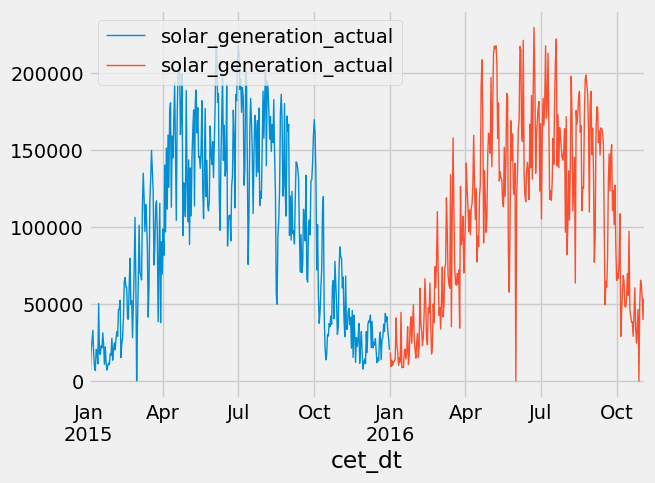

In [ ]:
solar_train = solar_ts.loc[:'2015']
solar_test = solar_ts.loc['2016':]

fig, ax = plt.subplots()
solar_train.plot(ax=ax, linewidth=1)
solar_test.plot(ax=ax, linewidth=1)
plt.show()

In [ ]:
# weekly:

solar_weekly_ts = ger_weekly_generation_df[['solar_generation_actual']]
weekly_period = 26 # 52 days in year

1

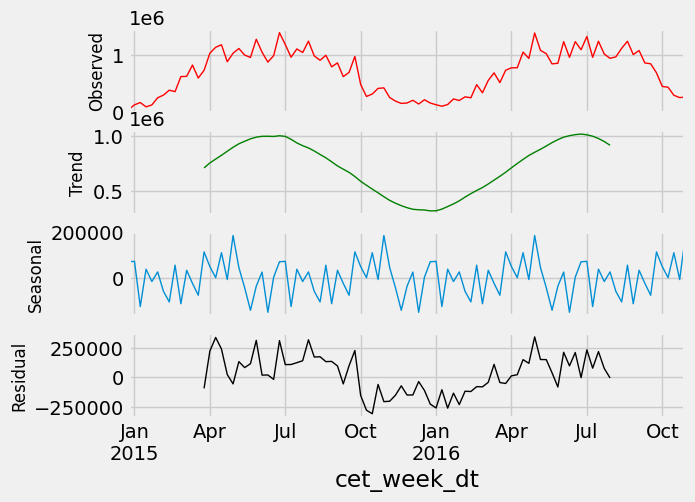

In [ ]:
plot_seasonal_components(solar_weekly_ts, weekly_period) # ['solar_generation_actual']

1. Yükselen ve alçalan  bir trend var. Zaman serimiz durağan değil.

2. Verilerimiz durağan olmadığından durağan hale getirmek için hangi farklamanın gerektiğini belirlememiz gerekiyor. Bu konuda bilgim burada bitiyor . Farklama için kaynak kodda  obtain_adf_kpss_results fonksiyonu kullanılmış. Biz de kullancaz.

3. Mevsimsel bileşende, mevsimsel bileşenin zaman içinde benzer olduğunu (çarpılmadığını) gözlemleyebiliriz. Bu nedenle, modelin mevsimsel bileşeni eklemeli (additive) bir yapıya sahiptir



4. Ayrıca, mevsimsel bileşende güneş enerjisi üretiminde Aralık-Ocak aylarında daha düşük üretim ve Haziran-Temmuz aylarında daha yüksek üretimle bir mevsimsellik olduğunu gözlemleyebiliriz.

# 3.1. Identification

In [ ]:
# d

obtain_adf_kpss_results(solar_weekly_ts, 3)

<ipython-input-74-3ff9c464d2d2>:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(ts, regression='c', nlags="auto")
<ipython-input-74-3ff9c464d2d2>:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(ts, regression='c', nlags="auto")
<ipython-input-74-3ff9c464d2d2>:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(ts, regression='c', nlags="auto")


d     adf_stats  p-value  is_adf_stationary  is_kpss_stationary  \
0  0  5.085752e-02      0.1              False                True   
1  1  5.103743e-02      0.1              False                True   
2  2  1.479966e-09      0.1               True                True   

   is_stationary  
0          False  
1          False  
2           True

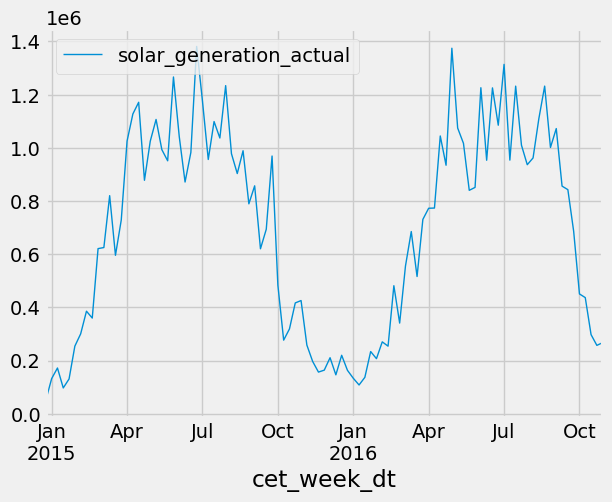

ADF Statistic: -2.854837208427539
p-value: 0.05085752073792617
Critical values: {'1%': -3.5078527246648834, '5%': -2.895382030636155, '10%': -2.584823877658872}


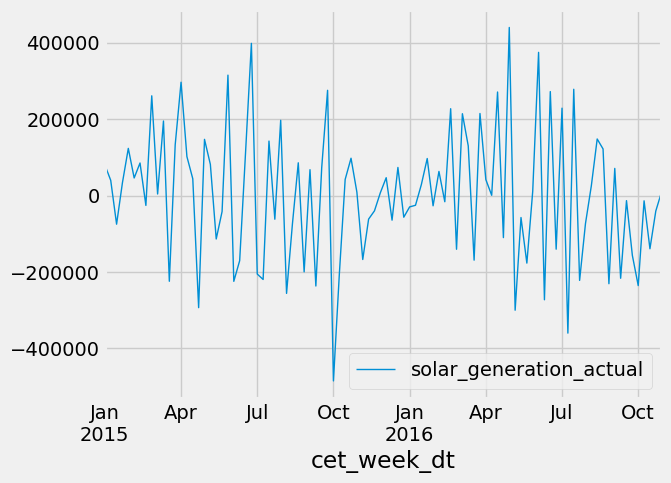

ADF Statistic: -2.853431789382159
p-value: 0.05103742749986239
Critical values: {'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}


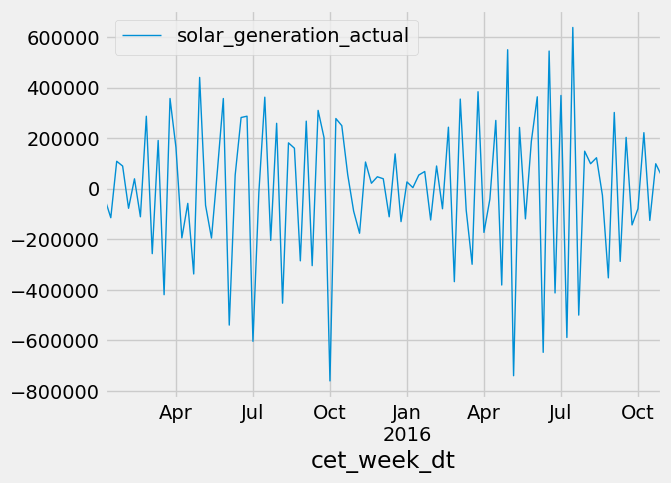

ADF Statistic: -6.875287742388453
p-value: 1.4799660809469499e-09
Critical values: {'1%': -3.506944401824286, '5%': -2.894989819214876, '10%': -2.584614550619835}


1

In [ ]:
# For time series
run_adf_test(solar_weekly_ts, 0)

# For the first difference of the time series
run_adf_test(solar_weekly_ts, 1)

# For the second difference of the time series
run_adf_test(solar_weekly_ts, 2)

P value muz %5 anlamlılık değerinden kücükse zaman serisi durağan kabul edilmez. bizim p value muza göre 1 kez farklama yeterli gibi yani d = 1

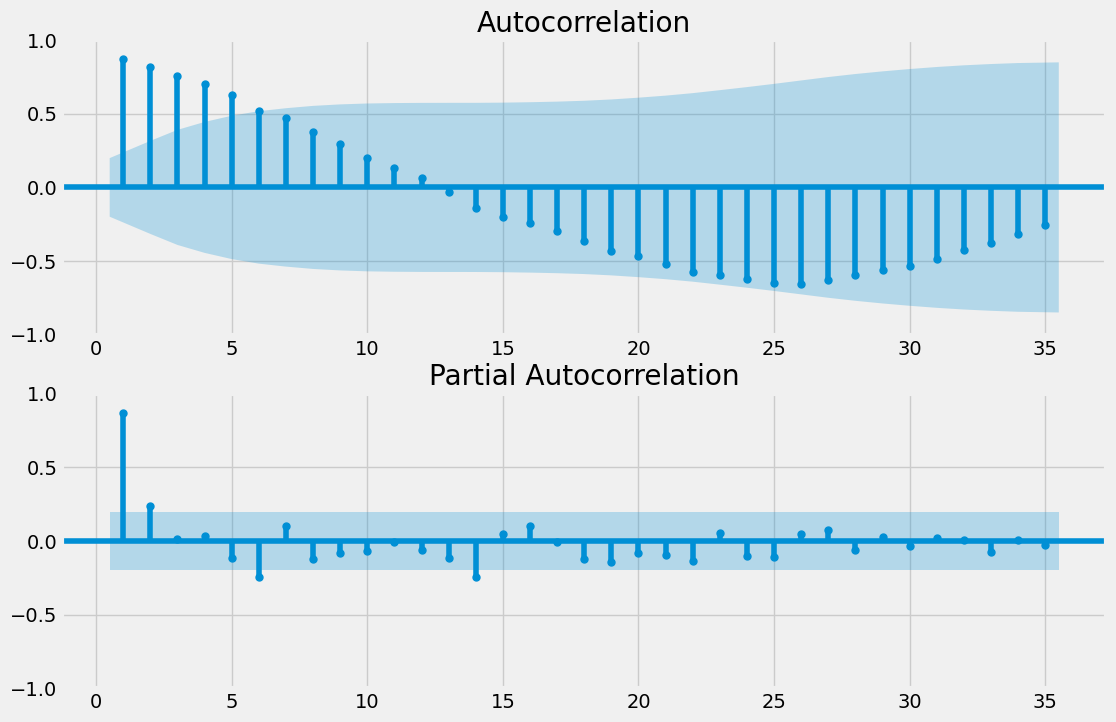

1

In [ ]:
plot_acf_pacf(solar_weekly_ts, 35)

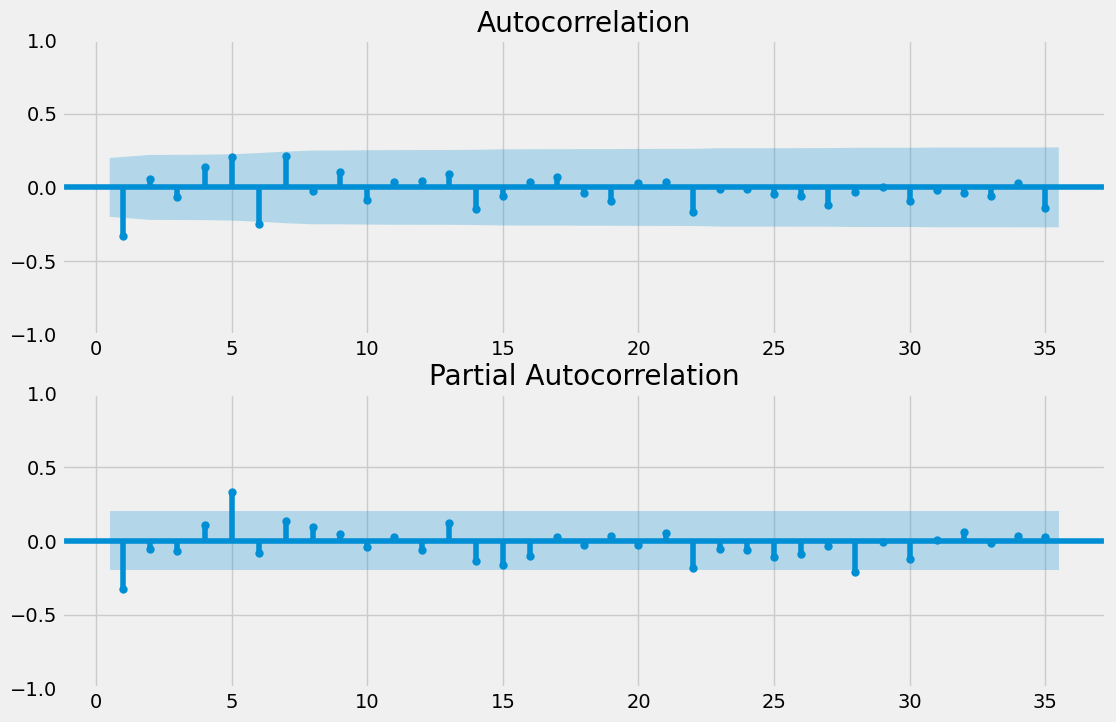

1

In [ ]:
plot_acf_pacf(solar_weekly_ts.diff().dropna(), 35)

# 3.2. Estimation

In [ ]:
# p, q

sort_aic_bic(solar_weekly_ts, 1, 11, 11)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  

Sorting by AIC:
      p   q          AIC          BIC
70    6   4  2575.432761  2603.640591
7     0   7  2575.738412  2596.253198
9     0   9  2576.700012  2602.343494
29    2   7  2576.885985  2602.529467
40    3   7  2577.580491  2605.788322
18    1   7  2577.737531  2600.816664
8     0   8  2577.750418  2600.829552
20    1   9  2578.323985  2606.531815
10    0  10  2578.396217  2606.604047
21    1  10  2578.587159  2609.359337
30    2   8  2578.613935  2606.821765
19    1   8  2579.185203  2604.828685
51    4   7  2579.506428  2610.278606
42    3   9  2579.722013  2613.058540
41    3   8  2579.731600  2610.503778
38    3   5  2579.846914  2602.926048
28    2   6  2579.989372  2603.068506
39    3   6  2580.212061  2605.855543
32    2  10  2580.301586  2613.638113
16    1   5  2580.472508  2598.422946
31    2   9  2580.501335  2611.273513
57    5   2  2580.648468  2601.163254
67    6   1  2580.764256  2601.279042
49    4   5  2580.867193  2606.510675
91    8   3  2581.023959  2611.796

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1

# 3.3. Model diagnostics

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean absolute error from residuals: 115885.32828005415

                                  SARIMAX Results                                  
Dep. Variable:     solar_generation_actual   No. Observations:                   97
Model:                      ARIMA(4, 1, 7)   Log Likelihood               -1277.753
Date:                     Fri, 29 Mar 2024   AIC                           2579.506
Time:                             21:08:02   BIC                           2610.279
Sample:                         12-29-2014   HQIC                          2591.945
                              - 10-31-2016                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7550      0.247      3.054      0.002       0.271       1.239
ar.L2          0.1223      0.256   

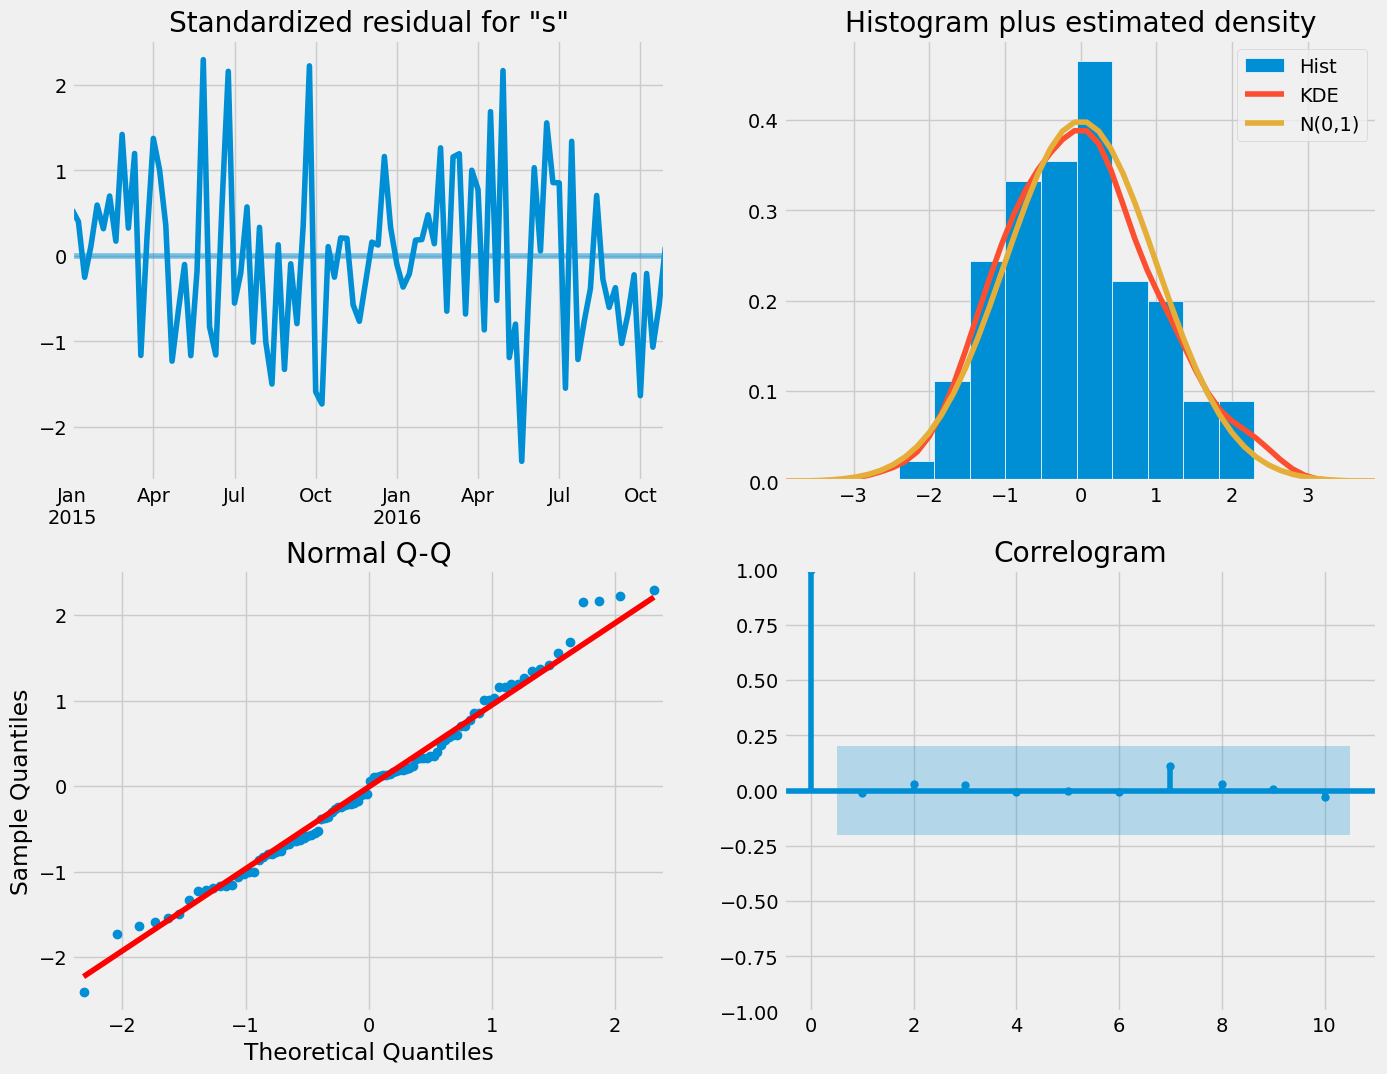

In [ ]:
solar_weekly_ts_results = arima_diagnostics(solar_weekly_ts, 4,1,7)

*Prob(Q) = 0.93 > 0.05  olduğu için hata terimlerinin ilişkili olmadığını gösteren boş hipotezi reddetmemeliyiz, yani hata terimleri ilişkili değildir*

Prob(JB) = 0.58 > 0.05 yani hata değer dağılımlarımız normal

belirlenen model genel olarak iyi bir model diyebiliriz

# 3.4. Seasonal Differencing

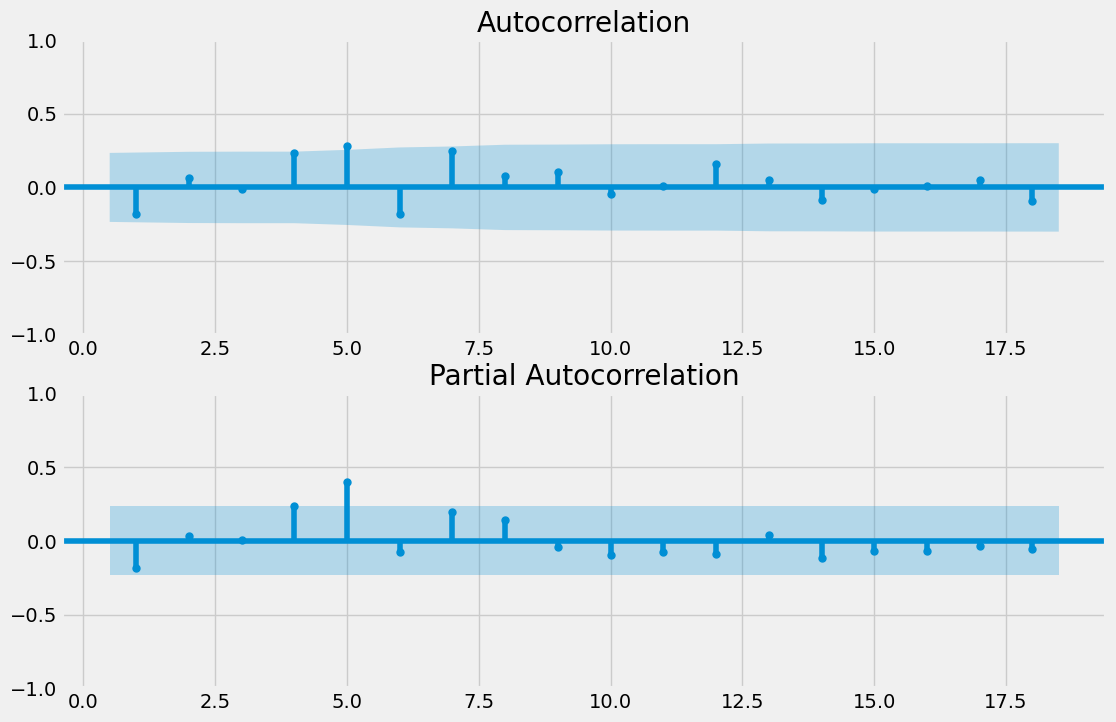

1

In [ ]:
# P, Q

plot_acf_pacf(solar_weekly_ts.diff().diff(weekly_period).dropna(), 18)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

Mean absolute error from residuals: 125108.1156790069

                                     SARIMAX Results                                      
Dep. Variable:            solar_generation_actual   No. Observations:                   97
Model:             ARIMA(4, 1, 7)x(1, 1, [1], 18)   Log Likelihood               -1050.310
Date:                            Fri, 29 Mar 2024   AIC                           2128.619
Time:                                    21:15:01   BIC                           2161.613
Sample:                                12-29-2014   HQIC                          2141.827
                                     - 10-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0413      0.952      0.043      0.965     

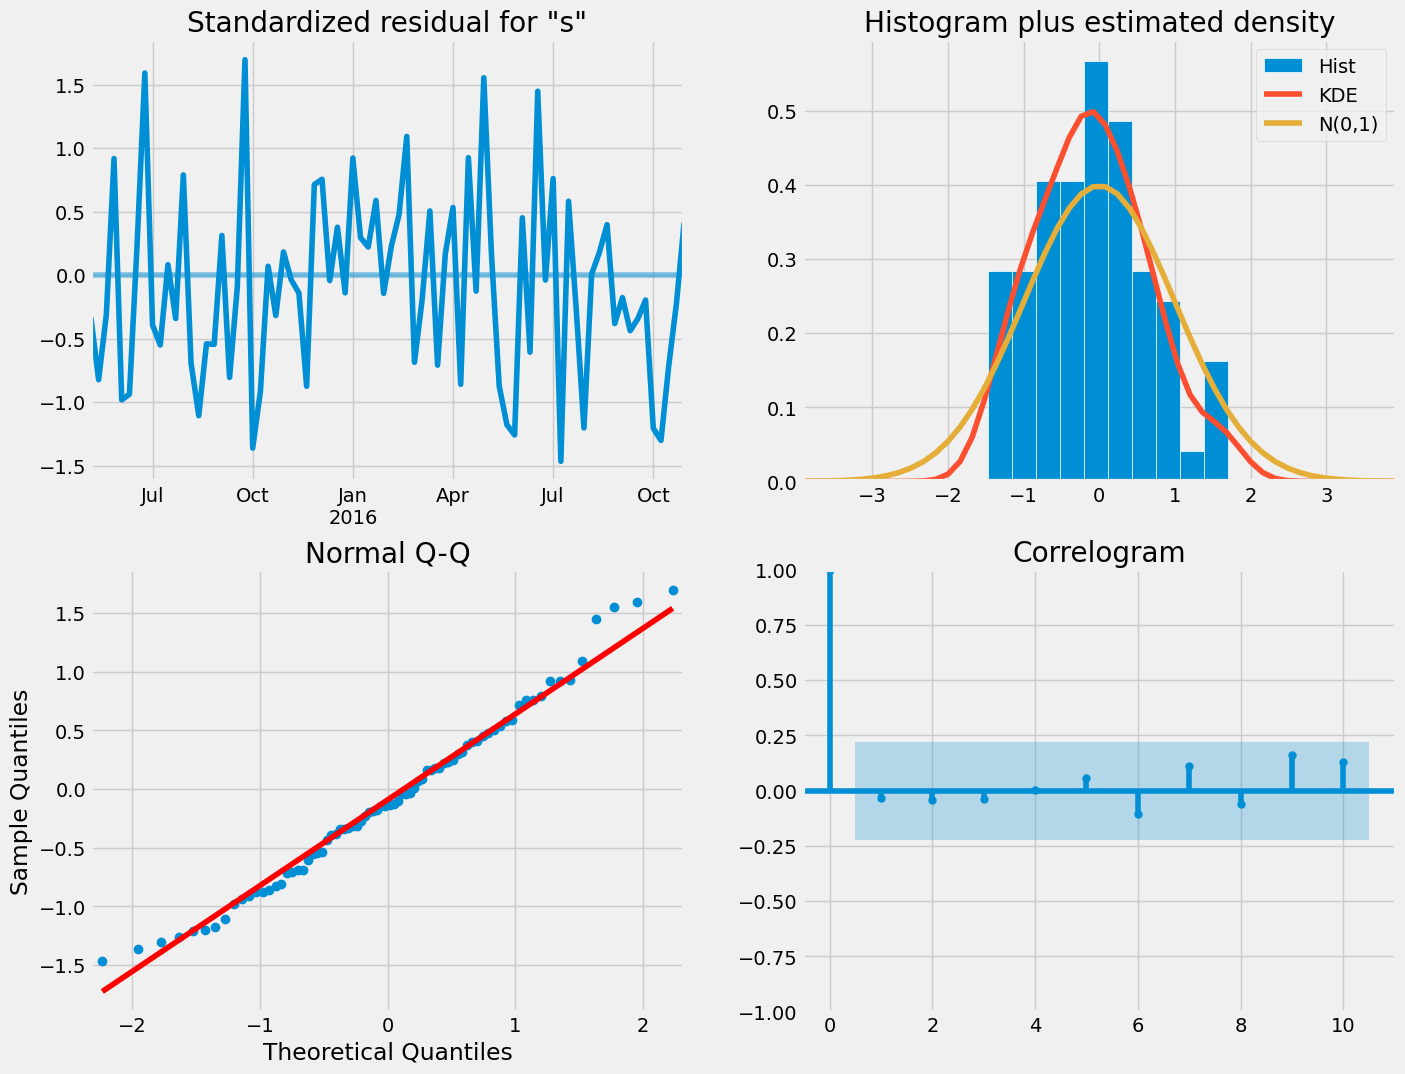

In [ ]:
solar_weekly_ts_seasonal_results = sarima_diagnostics(solar_weekly_ts, 4,1,7,1,1,1,18) # 2,1,2,1,1,1  # 6,1,1,0,1,1,52

# 3.5. Forecasting

In [ ]:
filled_2020_length = (datetime(2020, 10, 1, 0, 0, 0, 0) - datetime(2020, 1, 1, 0, 0, 0, 0)).days
print(filled_2020_length)

rest_2020_length = (datetime(2020, 12, 31, 0, 0, 0, 0) - datetime(2020, 10, 1, 0, 0, 0, 0)).days
print(rest_2020_length)

274
91


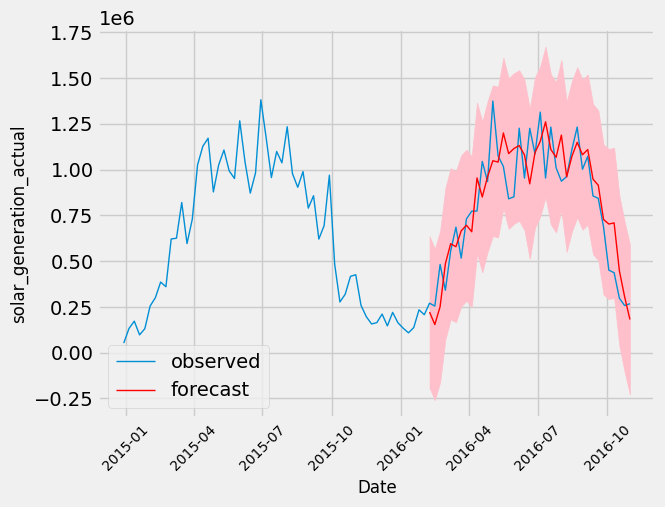

In [ ]:
# for non-dynamic

mean_predict, lower_limits, upper_limits = arima_limits(
    solar_weekly_ts_seasonal_results, 'solar_generation_actual', filled_2020_length//7, False
)
arima_plot(solar_weekly_ts, mean_predict, lower_limits, upper_limits)

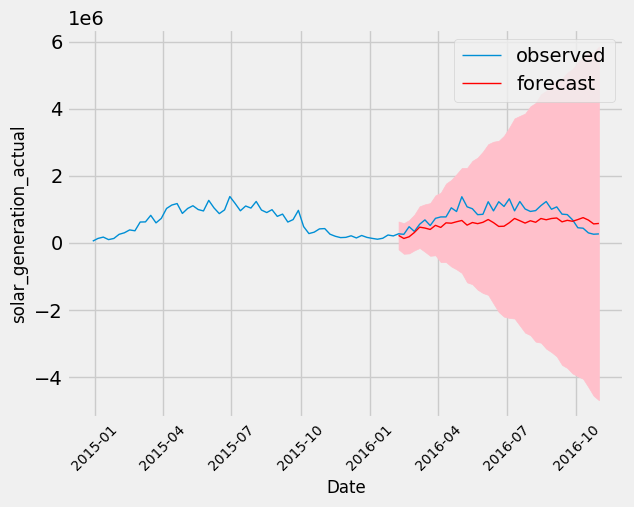

In [ ]:
# for dynamic

mean_predict, lower_limits, upper_limits = arima_limits(
    solar_weekly_ts_seasonal_results, 'solar_generation_actual', filled_2020_length//7, True
)
arima_plot(solar_weekly_ts, mean_predict, lower_limits, upper_limits)

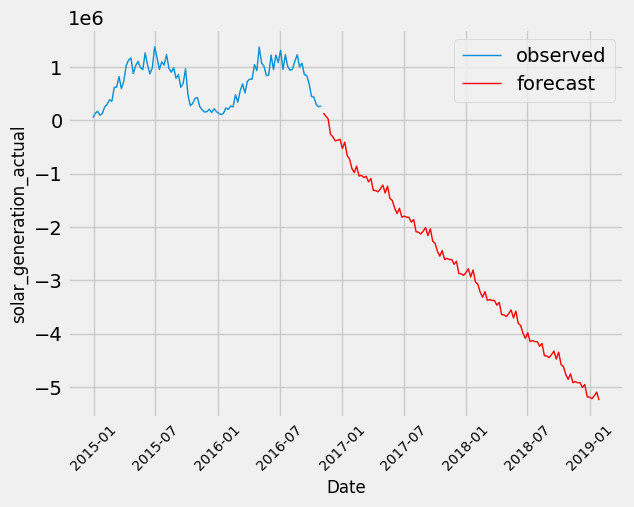

1

In [ ]:
solar_weekly_ts_forecast = arima_forecast(solar_weekly_ts_seasonal_results, (rest_2020_length+365*2)//7)
arima_plot_future(solar_weekly_ts, solar_weekly_ts_forecast)

# 3.6. Model accuracy

2016 için orijinal ve tahmin edilen data setini karşılaştıralım bakalım MAPE sine bakalım

In [ ]:
# ortalama mutlak hata MAE
arima_mae_relative(solar_weekly_ts, solar_weekly_ts_seasonal_results, filled_2016_length, True)



0.43339110557747684

In [ ]:
all_params_df_4_1_7 = list_params_for_mape(solar_weekly_ts, [4], [1], [7], range(0, 3), range(0, 2), range(0, 3), 35, filled_2020_length, False)
all_params_df_4_1_7

(4, 1, 7) (0, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON 

(4, 1, 7) (0, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 7) (0, 0, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(4, 1, 7) (0, 1, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(4, 1, 7) (0, 1, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(4, 1, 7) (0, 1, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(4, 1, 7) (1, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 1, 7) (1, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(4, 1, 7) (1, 0, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(4, 1, 7) (1, 1, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(4, 1, 7) (1, 1, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(4, 1, 7) (1, 1, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(4, 1, 7) (2, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(4, 1, 7) (2, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(4, 1, 7) (2, 0, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(4, 1, 7) (2, 1, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(4, 1, 7) (2, 1, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(4, 1, 7) (2, 1, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

parameters      MAPE
10  (4, 1, 7, 1, 1, 1)  0.169944
11  (4, 1, 7, 1, 1, 2)  0.169962
17  (4, 1, 7, 2, 1, 2)  0.169968
15  (4, 1, 7, 2, 1, 0)  0.169972
16  (4, 1, 7, 2, 1, 1)  0.169976
9   (4, 1, 7, 1, 1, 0)  0.169990
5   (4, 1, 7, 0, 1, 2)  0.174791
4   (4, 1, 7, 0, 1, 1)  0.177270
12  (4, 1, 7, 2, 0, 0)  0.179537
8   (4, 1, 7, 1, 0, 2)  0.181298
7   (4, 1, 7, 1, 0, 1)  0.181883
2   (4, 1, 7, 0, 0, 2)  0.182376
14  (4, 1, 7, 2, 0, 2)  0.182498
0   (4, 1, 7, 0, 0, 0)  0.183301
6   (4, 1, 7, 1, 0, 0)  0.183582
1   (4, 1, 7, 0, 0, 1)  0.184229
13  (4, 1, 7, 2, 0, 1)  0.185423
3   (4, 1, 7, 0, 1, 0)  0.222110

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

Mean absolute error from residuals: 113852.17315427292

                                     SARIMAX Results                                      
Dep. Variable:            solar_generation_actual   No. Observations:                   97
Model:             ARIMA(4, 1, 7)x(1, 0, [1], 52)   Log Likelihood               -1276.553
Date:                            Fri, 29 Mar 2024   AIC                           2581.107
Time:                                    21:55:02   BIC                           2617.007
Sample:                                12-29-2014   HQIC                          2595.618
                                     - 10-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8095      0.201      4.018      0.000    

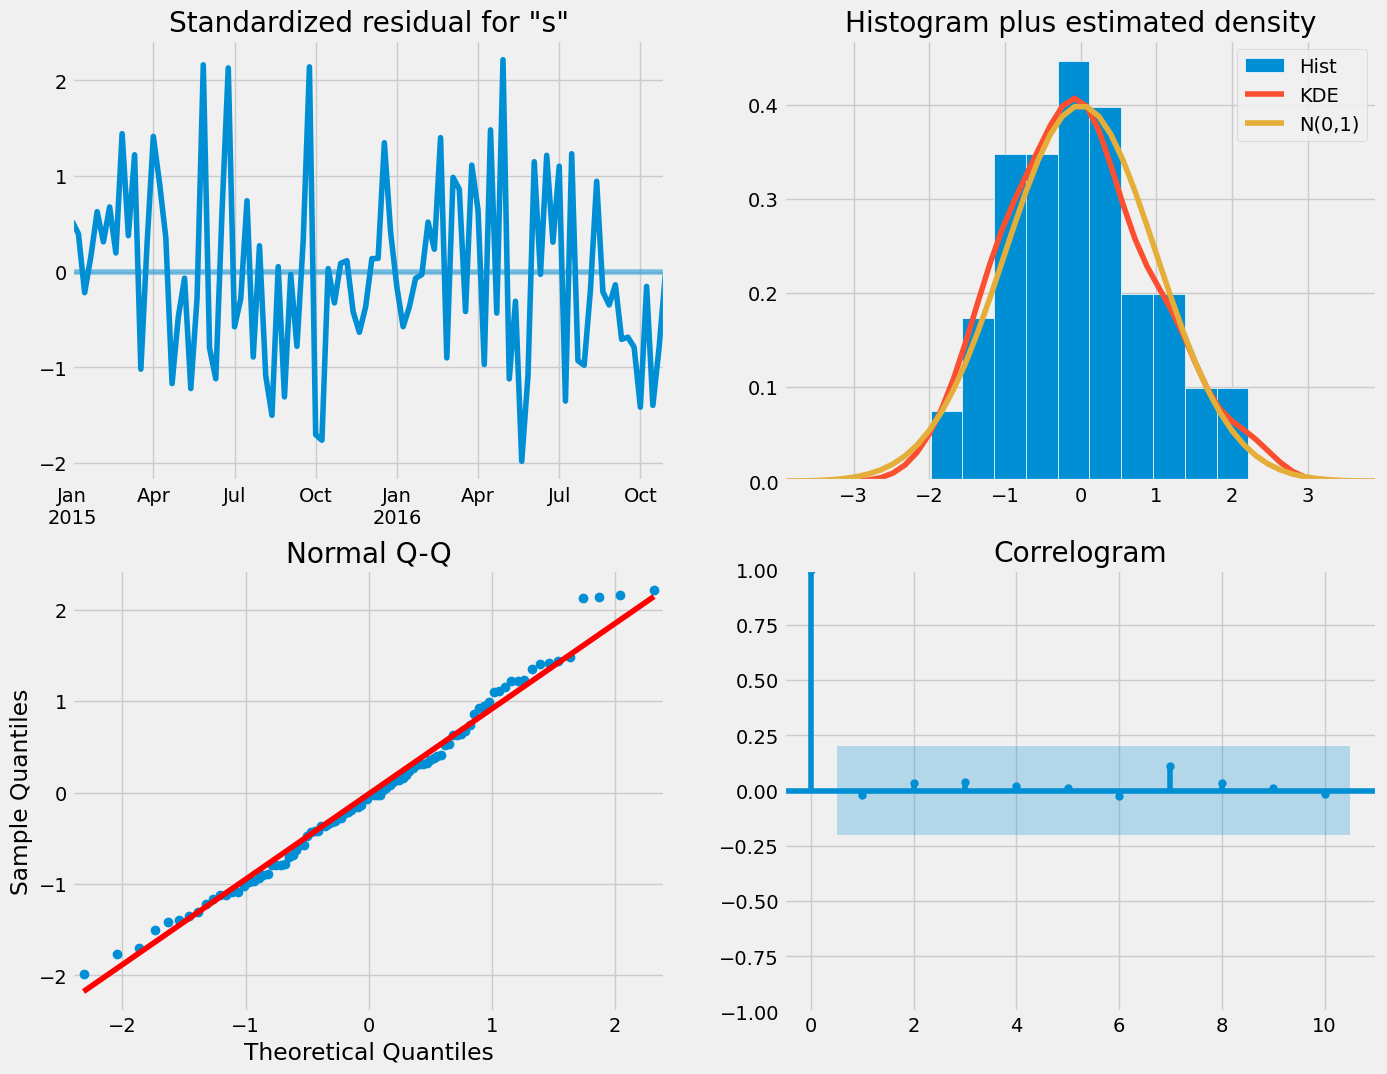

0.5874457256785514

In [ ]:
arima_mae_relative(solar_weekly_ts, sarima_diagnostics(solar_weekly_ts, 4,1,7,1,0,1,52), filled_2020_length, True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

Mean absolute error from residuals: 113852.17315427292

                                     SARIMAX Results                                      
Dep. Variable:            solar_generation_actual   No. Observations:                   97
Model:             ARIMA(4, 1, 7)x(1, 0, [1], 52)   Log Likelihood               -1276.553
Date:                            Fri, 29 Mar 2024   AIC                           2581.107
Time:                                    21:52:48   BIC                           2617.007
Sample:                                12-29-2014   HQIC                          2595.618
                                     - 10-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8095      0.201      4.018      0.000    

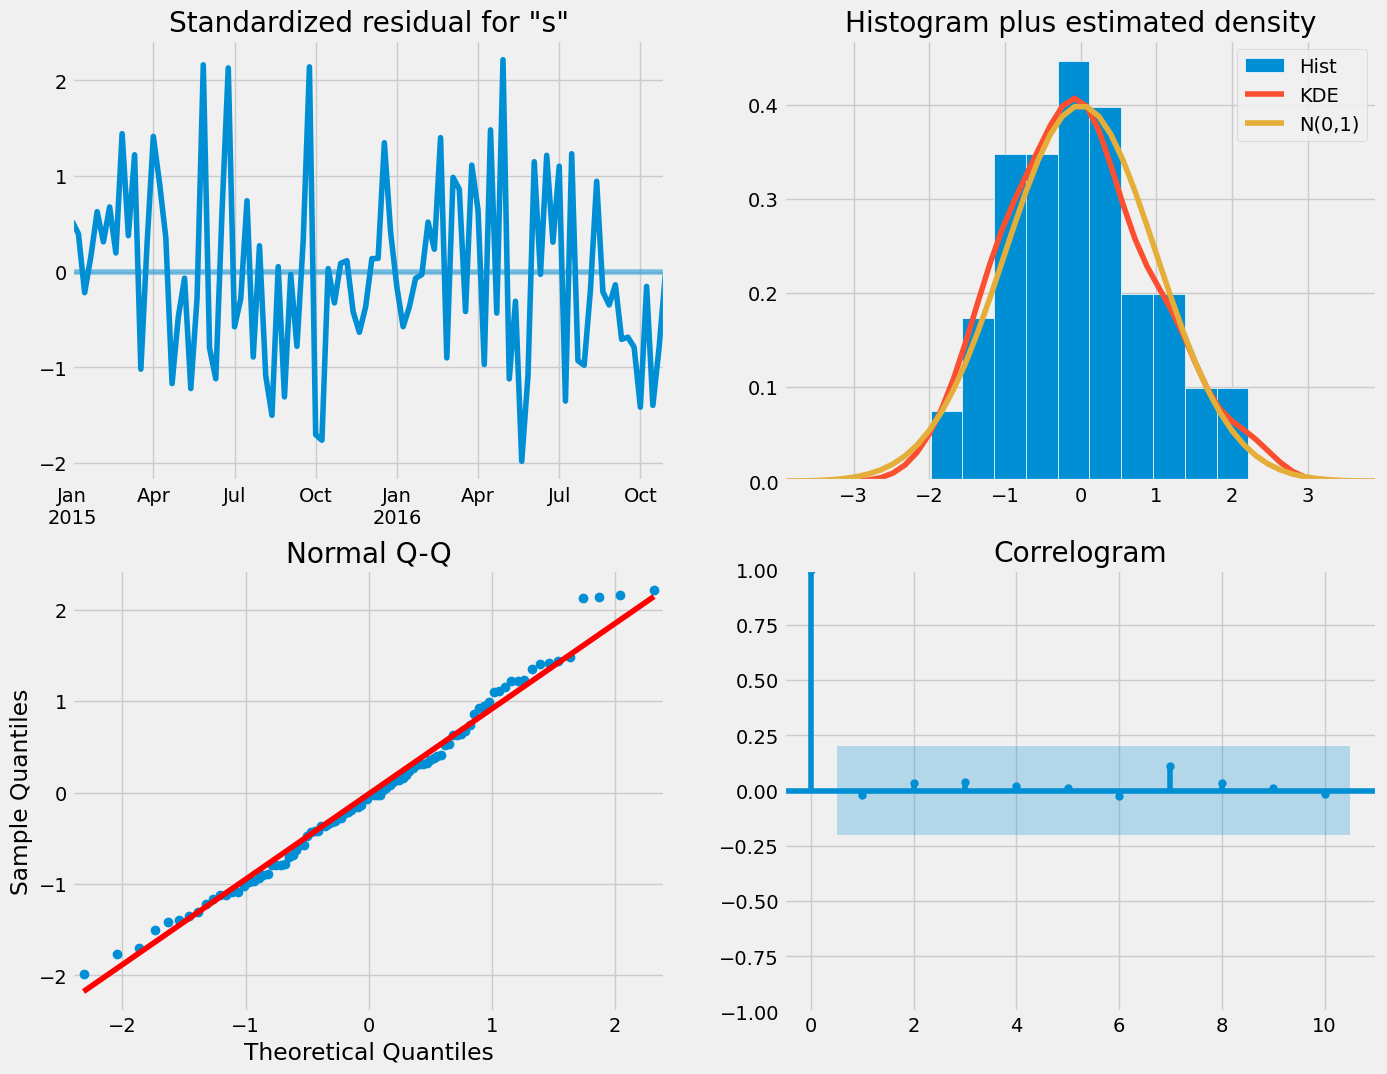

In [ ]:
solar_weekly_ts_seasonal_results_417101 = sarima_diagnostics(solar_weekly_ts, 4,1,7,1,0,1,52)

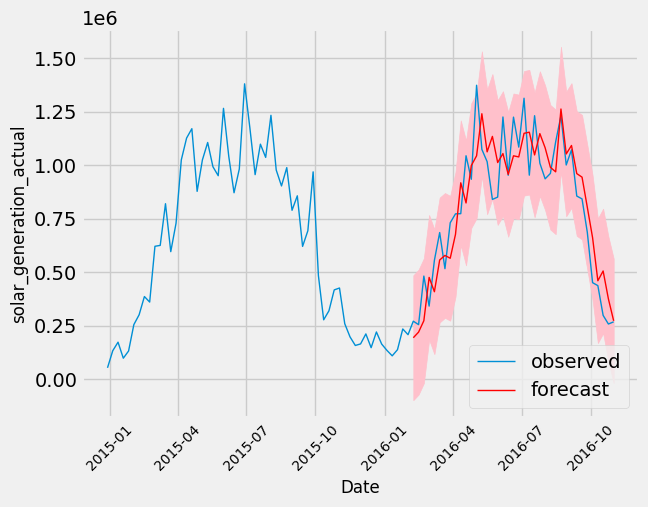

In [ ]:
# for non-dynamic

mean_predict, lower_limits, upper_limits = arima_limits(
    solar_weekly_ts_seasonal_results_417101, 'solar_generation_actual', filled_2020_length//7, False
)
arima_plot(solar_weekly_ts, mean_predict, lower_limits, upper_limits)

In [ ]:
all_params_df_8_7 = list_params_for_mape(solar_weekly_ts, [8], range(0, 2), [7], range(0, 2), range(0, 2), range(0, 2), 52, filled_2020_length, True)
all_params_df_8_7

(8, 0, 7) (0, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON 

(8, 0, 7) (0, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(8, 0, 7) (0, 1, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(8, 0, 7) (0, 1, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(8, 0, 7) (1, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(8, 0, 7) (1, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(8, 0, 7) (1, 1, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(8, 0, 7) (1, 1, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(8, 1, 7) (0, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON 

(8, 1, 7) (0, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(8, 1, 7) (0, 1, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(8, 1, 7) (0, 1, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(8, 1, 7) (1, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(8, 1, 7) (1, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(8, 1, 7) (1, 1, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(8, 1, 7) (1, 1, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

parameters      MAPE
5   (8, 0, 7, 1, 0, 1)  0.183468
1   (8, 0, 7, 0, 0, 1)  0.183567
0   (8, 0, 7, 0, 0, 0)  0.184928
4   (8, 0, 7, 1, 0, 0)  0.185191
7   (8, 0, 7, 1, 1, 1)  0.201871
6   (8, 0, 7, 1, 1, 0)  0.204468
3   (8, 0, 7, 0, 1, 1)  0.207290
2   (8, 0, 7, 0, 1, 0)  0.221402
10  (8, 1, 7, 0, 1, 0)  0.227551
12  (8, 1, 7, 1, 0, 0)  0.301748
15  (8, 1, 7, 1, 1, 1)  0.449620
14  (8, 1, 7, 1, 1, 0)  0.451514
9   (8, 1, 7, 0, 0, 1)  0.462267
13  (8, 1, 7, 1, 0, 1)  0.463033
11  (8, 1, 7, 0, 1, 1)  0.478043
8   (8, 1, 7, 0, 0, 0)  0.558765

In [ ]:
all_params_df_7_1_7 = list_params_for_mape(solar_weekly_ts, [7], [1], [7], range(0, 2), range(0, 2), range(0, 2), 52, filled_2020_length, True)
all_params_df_7_1_7

(7, 1, 7) (0, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON 

(7, 1, 7) (0, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(7, 1, 7) (0, 1, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(7, 1, 7) (0, 1, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(7, 1, 7) (1, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(7, 1, 7) (1, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(7, 1, 7) (1, 1, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(7, 1, 7) (1, 1, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

parameters      MAPE
2  (7, 1, 7, 0, 1, 0)  0.226547
6  (7, 1, 7, 1, 1, 0)  0.443801
3  (7, 1, 7, 0, 1, 1)  0.451477
4  (7, 1, 7, 1, 0, 0)  0.470753
1  (7, 1, 7, 0, 0, 1)  0.471564
7  (7, 1, 7, 1, 1, 1)  0.473745
5  (7, 1, 7, 1, 0, 1)  0.474070
0  (7, 1, 7, 0, 0, 0)  0.557310

In [ ]:
list_params_for_mape(solar_weekly_ts, [7], [1], [7], [0, 1], [0], [0, 1], 52, filled_2020_length, False)

(7, 1, 7) (0, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON 

(7, 1, 7) (0, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(7, 1, 7) (1, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(7, 1, 7) (1, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

parameters      MAPE
2  (7, 1, 7, 1, 0, 0)  0.180359
1  (7, 1, 7, 0, 0, 1)  0.180574
3  (7, 1, 7, 1, 0, 1)  0.180625
0  (7, 1, 7, 0, 0, 0)  0.182819

In [ ]:
list_params_for_mape(solar_weekly_ts, [8], [1], [7], [0, 1, 2], [0, 1], [0, 1, 2], 52, filled_2020_length, False)

(8, 1, 7) (0, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON 

(8, 1, 7) (0, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(8, 1, 7) (0, 0, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(8, 1, 7) (0, 1, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(8, 1, 7) (0, 1, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(8, 1, 7) (0, 1, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(8, 1, 7) (1, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(8, 1, 7) (1, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(8, 1, 7) (1, 0, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(8, 1, 7) (1, 1, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(8, 1, 7) (1, 1, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(8, 1, 7) (1, 1, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(8, 1, 7) (2, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(8, 1, 7) (2, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(8, 1, 7) (2, 0, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

(8, 1, 7) (2, 1, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(8, 1, 7) (2, 1, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(8, 1, 7) (2, 1, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

parameters      MAPE
10  (8, 1, 7, 1, 1, 1)  0.159094
15  (8, 1, 7, 2, 1, 0)  0.159217
9   (8, 1, 7, 1, 1, 0)  0.159451
16  (8, 1, 7, 2, 1, 1)  0.159486
11  (8, 1, 7, 1, 1, 2)  0.159603
17  (8, 1, 7, 2, 1, 2)  0.162166
5   (8, 1, 7, 0, 1, 2)  0.163679
6   (8, 1, 7, 1, 0, 0)  0.165839
4   (8, 1, 7, 0, 1, 1)  0.173421
8   (8, 1, 7, 1, 0, 2)  0.178810
2   (8, 1, 7, 0, 0, 2)  0.178858
13  (8, 1, 7, 2, 0, 1)  0.178955
12  (8, 1, 7, 2, 0, 0)  0.178966
1   (8, 1, 7, 0, 0, 1)  0.178972
14  (8, 1, 7, 2, 0, 2)  0.179062
7   (8, 1, 7, 1, 0, 1)  0.179275
0   (8, 1, 7, 0, 0, 0)  0.184699
3   (8, 1, 7, 0, 1, 0)  0.199374

In [ ]:
list_params_for_mape(solar_weekly_ts, [6], [1], [7], [0, 1, 2], [0, 1], [0, 1, 2], 52, filled_2020_length, True)

(6, 1, 7) (0, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

(6, 1, 7) (0, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(6, 1, 7) (0, 0, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters fo

(6, 1, 7) (0, 1, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(6, 1, 7) (0, 1, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(6, 1, 7) (0, 1, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(6, 1, 7) (1, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check ml

(6, 1, 7) (1, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters fo

(6, 1, 7) (1, 0, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters fo

(6, 1, 7) (1, 1, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(6, 1, 7) (1, 1, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(6, 1, 7) (1, 1, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(6, 1, 7) (2, 0, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters fo

(6, 1, 7) (2, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters fo

(6, 1, 7) (2, 0, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters fo

(6, 1, 7) (2, 1, 0)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(6, 1, 7) (2, 1, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

(6, 1, 7) (2, 1, 2)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters 

parameters      MAPE
3   (6, 1, 7, 0, 1, 0)  0.232704
4   (6, 1, 7, 0, 1, 1)  0.371110
5   (6, 1, 7, 0, 1, 2)  0.435449
16  (6, 1, 7, 2, 1, 1)  0.458562
1   (6, 1, 7, 0, 0, 1)  0.466465
9   (6, 1, 7, 1, 1, 0)  0.468733
6   (6, 1, 7, 1, 0, 0)  0.469503
15  (6, 1, 7, 2, 1, 0)  0.469786
11  (6, 1, 7, 1, 1, 2)  0.469909
17  (6, 1, 7, 2, 1, 2)  0.471111
7   (6, 1, 7, 1, 0, 1)  0.471447
2   (6, 1, 7, 0, 0, 2)  0.472031
13  (6, 1, 7, 2, 0, 1)  0.472124
14  (6, 1, 7, 2, 0, 2)  0.473324
12  (6, 1, 7, 2, 0, 0)  0.473459
8   (6, 1, 7, 1, 0, 2)  0.474140
10  (6, 1, 7, 1, 1, 1)  0.503035
0   (6, 1, 7, 0, 0, 0)  0.579423

In [ ]:
list_params_for_mape(solar_weekly_ts, [4], [1], [7], [1], [0], [1], 52, filled_2020_length, False)

(4, 1, 7) (1, 0, 1)52


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: 

parameters      MAPE
0  (4, 1, 7, 1, 0, 1)  0.181883